# Analisando os resultados

In [1]:
EXPERIMENTS_PATH = '../TCC/experiments'
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from plotnine import *

In [2]:
EXPERIMENT_NUMBER = 1

#### Primeiros passos

In [3]:
YEAR = 2023
df = pd.read_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/{YEAR}/enem_2023.csv')
df.head()

,id,year,area,sp_area,day,body,alternatives,answer,GEMINI_2023_answers,GPT-3.5-turbo-answers,GPT3.5_2023_answers,Llama2_2023_answers
0,01I,2023,LC - Linguagens e Códigos,Inglês,D1,"QUESTÃO 01 \nNo man is an island,\nEntire of ...",\nA medo da morte.\nB ideia de conexão.\nC con...,B,B,B,B,B
1,02I,2023,LC - Linguagens e Códigos,Inglês,D1,QUESTÃO 02 \nThings We Carry on the Sea\nWe c...,\nA risco de choques culturais.\nB impacto do ...,D,D,D,D,D
2,03I,2023,LC - Linguagens e Códigos,Inglês,D1,QUESTÃO 03 \nDescrição do cartaz: Foto de par...,\nA os lixões precisam de ampliação. \nB o des...,B,B,B,B,B
3,04I,2023,LC - Linguagens e Códigos,Inglês,D1,QUESTÃO 04 \nDescrição do cartum: Em um escri...,\nA criticar um padrão de vestimenta.\nB desta...,B,B,B,C,C
4,05I,2023,LC - Linguagens e Códigos,Inglês,D1,QUESTÃO 05 \nSpanglish (fragmento)\nTato Lavi...,\nA convergência linguístico-cultural.\nB cara...,A,A,A,A,A


In [4]:
df['GPT_result'] = df['GPT3.5_2023_answers'] == df['answer']
df['GPT_result'].value_counts()

GPT_result
True     110
False     75
Name: count, dtype: int64

In [5]:
df['GPT_UI_result'] = df['GPT-3.5-turbo-answers'] == df['answer']
df['GPT_UI_result'].value_counts()

GPT_UI_result
True     128
False     57
Name: count, dtype: int64

In [6]:
df['Llama2_result'] = df['Llama2_2023_answers'] == df['answer']
df['Llama2_result'].value_counts()

Llama2_result
False    95
True     90
Name: count, dtype: int64

In [7]:
df['GEMINI_result'] = df['GEMINI_2023_answers'] == df['answer']
df['GEMINI_result'].value_counts()

GEMINI_result
True     132
False     53
Name: count, dtype: int64

In [8]:
df['answer'].value_counts()

answer
A          46
C          38
D          37
B          34
E          29
Anulado     1
Name: count, dtype: int64

### Funções

In [9]:
def check_models_answers(df, year):
    print(df[f"answer"].value_counts())
    df = df[df['answer'] != 'Anulado']
    print(df[f'GEMINI_{year}_answers'].value_counts())
    print('Soma das respostas do GEMINI:', df[f'GEMINI_{year}_answers'].value_counts().sum())
    print(df[f'GPT3.5_{year}_answers'].value_counts())
    print('Soma das respostas do GPT3.5:', df[f'GPT3.5_{year}_answers'].value_counts().sum()) 
    print(df[f'Llama2_{year}_answers'].value_counts())
    print('Soma das respostas do Llama2:', df[f'Llama2_{year}_answers'].value_counts().sum())

In [10]:
def check_models_results(df, year):
    df['GPT_result'] = np.where(df[f'GPT3.5_{year}_answers'] == 'No answer', 'No answer', df[f'GPT3.5_{year}_answers'] == df['answer'])
    print(df['GPT_result'].value_counts())
    df['Llama2_result'] = np.where(df[f'Llama2_{year}_answers'] == 'No answer', 'No answer', df[f'Llama2_{year}_answers'] == df['answer'])
    print(df['Llama2_result'].value_counts())
    df['GEMINI_result'] = np.where(df[f'GEMINI_{year}_answers'] == 'No answer', 'No answer', df[f'GEMINI_{year}_answers'] == df['answer'])
    print(df['GEMINI_result'].value_counts())


In [11]:
def check_areas_results(model, df):
    areas_dict = {}
    areas_dict['Model'] = model
    
    cn_df = df.query('area == "CN - Ciências da Natureza"')
    areas_dict['CN_true'] = cn_df.query(f'{model}_result == "True"').shape[0]
    areas_dict['CN_false'] = cn_df.query(f'{model}_result == "False"').shape[0]
    # if(areas_dict['CN_true'] + areas_dict['CN_false'] < 45):
    areas_dict['CN_no_answer'] = int(cn_df.query(f'{model}_result == "No answer"').shape[0])
    
    ch_df = df.query('area == "CH - Ciências Humanas"')
    areas_dict['CH_true'] = ch_df.query(f'{model}_result == "True"').shape[0]
    areas_dict['CH_false'] = ch_df.query(f'{model}_result == "False"').shape[0]
    # if(areas_dict['CH_true'] + areas_dict['CH_false'] < 45):
    areas_dict['CH_no_answer'] = int(ch_df.query(f'{model}_result == "No answer"').shape[0])
    
    lc_df = df.query('area == "LC - Linguagens e Códigos"')
    areas_dict['LC_true'] = lc_df.query(f'{model}_result == "True"').shape[0]
    areas_dict['LC_false'] = lc_df.query(f'{model}_result == "False"').shape[0]
    # if(areas_dict['LC_true'] + areas_dict['LC_false'] < 50):
    areas_dict['LC_no_answer'] = int(lc_df.query(f'{model}_result == "No answer"').shape[0])
    
    mt_df = df.query('area == "MT - Matemática e Códigos"')
    areas_dict['MT_true'] = mt_df.query(f'{model}_result == "True"').shape[0]
    areas_dict['MT_false'] = mt_df.query(f'{model}_result == "False"').shape[0]
    # if(areas_dict['MT_true'] + areas_dict['MT_false'] < 45):
    areas_dict['MT_no_answer'] = int(mt_df.query(f'{model}_result == "No answer"').shape[0])
        
    return areas_dict

In [12]:
def save_models_results(df, year):
    
    df = df[df['answer'] != 'Anulado']

    
    result_counts_gemini = df['GEMINI_result'].value_counts()
    result_counts_gemini = pd.DataFrame(result_counts_gemini).transpose()
    
    if ('No answer' in result_counts_gemini.columns):
        result_counts_gemini = result_counts_gemini.rename(columns={'True': 'Right', 'False': 'Wrong'})
    else: 
        result_counts_gemini = result_counts_gemini.rename(columns={True: 'Right', False: 'Wrong'})
    result_counts_gemini['Year'] = year
    result_counts_gemini['Model'] = 'GEMINI'
    
    areas_stats = check_areas_results(result_counts_gemini['Model'].values[0], df)
    areas_stats_df = pd.DataFrame(areas_stats, index=[0]).set_index('Model')
    result_counts_gemini = result_counts_gemini.join(areas_stats_df, on='Model', how='left')
    

    result_counts_gpt = df['GPT_result'].value_counts()
    result_counts_gpt = pd.DataFrame(result_counts_gpt).transpose()
    
    
    if('No answer' in result_counts_gpt.columns):
        result_counts_gpt = result_counts_gpt.rename(columns={'True': 'Right', 'False': 'Wrong'})
    else:
        result_counts_gpt = result_counts_gpt.rename(columns={True: 'Right', False: 'Wrong'})
    result_counts_gpt['Year'] = year
    result_counts_gpt['Model'] = 'GPT'

    areas_stats = check_areas_results(result_counts_gpt['Model'].values[0], df)
    areas_stats_df = pd.DataFrame(areas_stats, index=[0]).set_index('Model')
    result_counts_gpt = result_counts_gpt.join(areas_stats_df, on='Model', how='left')
    
    
    result_counts_llama = df['Llama2_result'].value_counts()
    result_counts_llama = pd.DataFrame(result_counts_llama).transpose()
    
    if('No answer' in result_counts_llama.columns):
        result_counts_llama = result_counts_llama.rename(columns={'True': 'Right', 'False': 'Wrong'})
    else:
        result_counts_llama = result_counts_llama.rename(columns={True: 'Right', False: 'Wrong'})
    result_counts_llama['Year'] = year
    result_counts_llama['Model'] = 'Llama2'
    
    areas_stats = check_areas_results(result_counts_llama['Model'].values[0], df)
    areas_stats_df = pd.DataFrame(areas_stats, index=[0]).set_index('Model')
    result_counts_llama = result_counts_llama.join(areas_stats_df, on='Model', how='left')
    
    if('True' in result_counts_llama.columns) or ('False' in result_counts_llama.columns):
        result_counts_llama = result_counts_llama.rename(columns={'True': 'Right', 'False': 'Wrong'})
    if('True' in result_counts_gpt.columns) or ('False' in result_counts_gpt.columns):
        result_counts_gpt = result_counts_gpt.rename(columns={'True': 'Right', 'False': 'Wrong'})
    if('True' in result_counts_gemini.columns) or ('False' in result_counts_gemini.columns):
        result_counts_gemini = result_counts_gemini.rename(columns={'True': 'Right', 'False': 'Wrong'})

    # display(result_counts_gemini)
    # display(result_counts_gpt)
    # display(result_counts_llama)
    result_counts_total_df = pd.concat([result_counts_gemini, result_counts_gpt, result_counts_llama], ignore_index=True).fillna(0)

    display(result_counts_total_df.head())
    return result_counts_total_df


In [13]:
def calculate_perc_area(df, length=185):

    print(length)
    if((df['Right'] + df['Wrong']).tolist() == [length,length,length]):
        df['No answer'] = 0
    total = df['Right'] + df['Wrong'] + df['No answer']
    
    
    df['Right_perc'] = round((df['Right'] / total * 100),2)
    df['Wrong_perc'] = round((df['Wrong'] / total * 100),2)
    df['No_answer_perc'] = round((df['No answer'] / total * 100),2)
    
    total_CN = df['CN_true'] + df['CN_false'] + df['CN_no_answer']
    total_CH = df['CH_true'] + df['CH_false'] + df['CH_no_answer']
    total_LC = df['LC_true'] + df['LC_false'] + df['LC_no_answer']
    total_MT = df['MT_true'] + df['MT_false'] + df['MT_no_answer']
    # print('Total CN:', total_CN)
    # print('Total CH:', total_CH)
    # print('Total LC:', total_LC)
    # print('Total MT:', total_MT)
    
    df['CN_Right_perc'] = round((df['CN_true'] / total_CN * 100), 2)
    df['CN_Wrong_perc'] = round((df['CN_false'] / total_CN * 100), 2)
    df['CN_No_answer_perc'] = round((df['CN_no_answer'] / total_CN * 100), 2)
    
    df['CH_Right_perc'] = round((df['CH_true'] / total_CH * 100), 2)
    df['CH_Wrong_perc'] = round((df['CH_false'] / total_CH * 100), 2)
    df['CH_No_answer_perc'] = round((df['CH_no_answer'] / total_CH * 100), 2)
    
    df['LC_Right_perc'] = round((df['LC_true'] / total_LC * 100), 2)
    df['LC_Wrong_perc'] = round((df['LC_false'] / total_LC * 100), 2)
    df['LC_No_answer_perc'] = round((df['LC_no_answer'] / total_LC * 100), 2)
    
    df['MT_Right_perc'] = round((df['MT_true'] / total_MT * 100), 2)
    df['MT_Wrong_perc'] = round((df['MT_false'] / total_MT * 100), 2)
    df['MT_No_answer_perc'] = round((df['MT_no_answer'] / total_MT * 100), 2)
    
    display(df[['Model','Right_perc','Wrong_perc','No_answer_perc','CN_Right_perc','CN_Wrong_perc','CN_No_answer_perc','CH_Right_perc','CH_Wrong_perc','CH_No_answer_perc','LC_Right_perc','LC_Wrong_perc','LC_No_answer_perc','MT_Right_perc','MT_Wrong_perc','MT_No_answer_perc']])
    return df[['Model','Right_perc','Wrong_perc','No_answer_perc','CN_Right_perc','CN_Wrong_perc','CN_No_answer_perc','CH_Right_perc','CH_Wrong_perc','CH_No_answer_perc','LC_Right_perc','LC_Wrong_perc','LC_No_answer_perc','MT_Right_perc','MT_Wrong_perc','MT_No_answer_perc']]    

### Experimento 1

#### Análise 2017 - 2023

In [14]:
df_2017 = pd.read_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/2017/enem_2017.csv')
df_2018 = pd.read_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/2018/enem_2018.csv')
display(df_2018.head())
df_2019 = pd.read_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/2019/enem_2019.csv')
# display(df_2019.head())
df_2020 = pd.read_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/2020/enem_2020.csv')
# display(df_2020.head())   
df_2022 = pd.read_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/2022/enem_2022.csv')
# display(df_2022.head())
df_2023 = pd.read_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/2023/enem_2023.csv')
# display(df_2023.head())   

,id,year,area,sp_area,day,body,alternatives,answer,GEMINI_2018_answers,GPT3.5_2018_answers,Llama2_2018_answers
0,01I,2018,LC - Linguagens e Códigos,Inglês,D1,QUESTÃO 01 \nLava Mae: Creating Showers on Wh...,\nA empregar moradores de rua em lava a jatos ...,B,B,B,B
1,02I,2018,LC - Linguagens e Códigos,Inglês,D1,QUESTÃO 02 \nDescrição do cartum:\nO cartum a...,\nA se aposente prematuramente.\nB amadureça p...,B,B,B,B
2,03I,2018,LC - Linguagens e Códigos,Inglês,D1,"QUESTÃO 03 \nDon't write in English, they sai...",\nA usa a língua inglesa com efeito humorístic...,D,D,D,D
3,04I,2018,LC - Linguagens e Códigos,Inglês,D1,QUESTÃO 04 \nTEXTO I\n A Free World-class Edu...,\nA elogiar o trabalho proposto para a educaçã...,E,E,E,E
4,05I,2018,LC - Linguagens e Códigos,Inglês,D1,QUESTÃO 05 \n1984 (excerpt)\nGeorge Orwell\n‘...,\nA boicote a ideais libertários.\nB veto ao c...,C,C,C,C


##### Enem 2017

In [15]:
check_models_answers(df_2017, df_2017['year'].unique()[0])
check_models_results(df_2017, df_2017['year'].unique()[0])

answer
D    42
E    38
B    38
A    35
C    32
Name: count, dtype: int64
GEMINI_2017_answers
A            43
B            39
E            38
C            34
D            29
No answer     2
Name: count, dtype: int64
Soma das respostas do GEMINI: 185
GPT3.5_2017_answers
D    42
C    40
B    36
A    34
E    33
Name: count, dtype: int64
Soma das respostas do GPT3.5: 185
Llama2_2017_answers
C    80
D    35
B    35
E    26
A     9
Name: count, dtype: int64
Soma das respostas do Llama2: 185
GPT_result
True     106
False     79
Name: count, dtype: int64
Llama2_result
False    96
True     89
Name: count, dtype: int64
GEMINI_result
True         126
False         57
No answer      2
Name: count, dtype: int64


In [16]:
enem_2017_results = save_models_results(df_2017, df_2017['year'].unique()[0])

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,126,57,2.0,2017,GEMINI,33,12,0,41,3,1,40,9,1,12,33,0
1,106,79,0.0,2017,GPT,27,18,0,38,7,0,31,19,0,10,35,0
2,89,96,0.0,2017,Llama2,17,28,0,37,8,0,26,24,0,9,36,0


In [17]:
enem_2017_results_perc = calculate_perc_area(enem_2017_results.copy())

185


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,68.11,30.81,1.08,73.33,26.67,0.0,91.11,6.67,2.22,80.0,18.0,2.0,26.67,73.33,0.0
1,GPT,57.30,42.70,0.00,60.00,40.00,0.0,84.44,15.56,0.00,62.0,38.0,0.0,22.22,77.78,0.0
2,Llama2,48.11,51.89,0.00,37.78,62.22,0.0,82.22,17.78,0.00,52.0,48.0,0.0,20.00,80.00,0.0


##### Enem 2018

In [18]:
check_models_answers(df_2018, df_2018['year'].unique()[0])
check_models_results(df_2018, df_2018['year'].unique()[0])

answer
B          43
E          39
D          37
C          34
A          31
Anulado     1
Name: count, dtype: int64
GEMINI_2018_answers
B            43
E            38
C            35
A            35
D            30
No answer     3
Name: count, dtype: int64
Soma das respostas do GEMINI: 184
GPT3.5_2018_answers
E    45
B    42
D    41
C    36
A    20
Name: count, dtype: int64
Soma das respostas do GPT3.5: 184
Llama2_2018_answers
C    69
B    53
E    30
D    25
A     7
Name: count, dtype: int64
Soma das respostas do Llama2: 184
GPT_result
True     96
False    89
Name: count, dtype: int64
Llama2_result
False    100
True      85
Name: count, dtype: int64
GEMINI_result
True         120
False         62
No answer      3
Name: count, dtype: int64


In [19]:
enem_2018_results = save_models_results(df_2018, df_2018['year'].unique()[0])

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,120,61,3.0,2018,GEMINI,30,15,0,39,5,1,36,12,2,15,29,0
1,96,88,0.0,2018,GPT,22,23,0,36,9,0,30,20,0,8,36,0
2,85,99,0.0,2018,Llama2,18,27,0,32,13,0,31,19,0,4,40,0


In [20]:
leng = df_2018[df_2018['answer'] != 'Anulado'].shape[0]
enem_2018_results_perc = calculate_perc_area(enem_2018_results.copy(),leng)

184


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,65.22,33.15,1.63,66.67,33.33,0.0,86.67,11.11,2.22,72.0,24.0,4.0,34.09,65.91,0.0
1,GPT,52.17,47.83,0.00,48.89,51.11,0.0,80.00,20.00,0.00,60.0,40.0,0.0,18.18,81.82,0.0
2,Llama2,46.20,53.80,0.00,40.00,60.00,0.0,71.11,28.89,0.00,62.0,38.0,0.0,9.09,90.91,0.0


##### Enem 2019

In [21]:
check_models_answers(df_2019, df_2019['year'].unique()[0])
check_models_results(df_2019, df_2019['year'].unique()[0])

answer
B    41
C    40
A    37
D    35
E    32
Name: count, dtype: int64
GEMINI_2019_answers
A            45
C            41
B            39
D            35
E            24
No answer     1
Name: count, dtype: int64
Soma das respostas do GEMINI: 185
GPT3.5_2019_answers
D    50
C    39
B    34
E    34
A    28
Name: count, dtype: int64
Soma das respostas do GPT3.5: 185
Llama2_2019_answers
C    68
B    49
E    30
D    26
A    12
Name: count, dtype: int64
Soma das respostas do Llama2: 185
GPT_result
True     107
False     78
Name: count, dtype: int64
Llama2_result
False    103
True      82
Name: count, dtype: int64
GEMINI_result
True         125
False         59
No answer      1
Name: count, dtype: int64


In [22]:
enem_2019_results = save_models_results(df_2019, df_2019['year'].unique()[0])

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,125,59,1.0,2019,GEMINI,26,19,0,39,6,0,41,8,1,19,26,0
1,107,78,0.0,2019,GPT,27,18,0,35,10,0,35,15,0,10,35,0
2,82,103,0.0,2019,Llama2,20,25,0,32,13,0,26,24,0,4,41,0


In [23]:
enem_2019_results_perc = calculate_perc_area(enem_2019_results.copy())

185


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,67.57,31.89,0.54,57.78,42.22,0.0,86.67,13.33,0.0,82.0,16.0,2.0,42.22,57.78,0.0
1,GPT,57.84,42.16,0.00,60.00,40.00,0.0,77.78,22.22,0.0,70.0,30.0,0.0,22.22,77.78,0.0
2,Llama2,44.32,55.68,0.00,44.44,55.56,0.0,71.11,28.89,0.0,52.0,48.0,0.0,8.89,91.11,0.0


##### Enem 2020

In [24]:
check_models_answers(df_2020, df_2020['year'].unique()[0])
check_models_results(df_2020, df_2020['year'].unique()[0])

answer
C          43
D          41
A          34
B          34
E          31
Anulado     2
Name: count, dtype: int64
GEMINI_2020_answers
C            42
D            41
A            40
B            35
E            24
No answer     1
Name: count, dtype: int64
Soma das respostas do GEMINI: 183
GPT3.5_2020_answers
A    49
D    48
C    38
E    26
B    22
Name: count, dtype: int64
Soma das respostas do GPT3.5: 183
Llama2_2020_answers
C    80
D    36
B    31
E    27
A     9
Name: count, dtype: int64
Soma das respostas do Llama2: 183
GPT_result
True     93
False    92
Name: count, dtype: int64
Llama2_result
True     101
False     84
Name: count, dtype: int64
GEMINI_result
True         128
False         56
No answer      1
Name: count, dtype: int64


In [25]:
enem_2020_results = save_models_results(df_2020, df_2020['year'].unique()[0])

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,128,54,1.0,2020,GEMINI,29,14,1,39,6,0,43,7,0,17,27,0
1,93,90,0.0,2020,GPT,18,26,0,32,13,0,36,14,0,7,37,0
2,101,82,0.0,2020,Llama2,22,22,0,31,14,0,30,20,0,18,26,0


In [26]:
leng = df_2020[df_2020['answer'] != 'Anulado'].shape[0]
enem_2020_results_perc = calculate_perc_area(enem_2020_results.copy(),leng)

183


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,69.95,29.51,0.55,65.91,31.82,2.27,86.67,13.33,0.0,86.0,14.0,0.0,38.64,61.36,0.0
1,GPT,50.82,49.18,0.00,40.91,59.09,0.00,71.11,28.89,0.0,72.0,28.0,0.0,15.91,84.09,0.0
2,Llama2,55.19,44.81,0.00,50.00,50.00,0.00,68.89,31.11,0.0,60.0,40.0,0.0,40.91,59.09,0.0


##### Enem 2022

In [27]:
check_models_answers(df_2022, df_2022['year'].unique()[0])
check_models_results(df_2022, df_2022['year'].unique()[0])

answer
C          39
A          39
B          37
E          36
D          33
Anulado     1
Name: count, dtype: int64
GEMINI_2022_answers
A            46
C            45
B            33
D            30
E            26
No answer     4
Name: count, dtype: int64
Soma das respostas do GEMINI: 184
GPT3.5_2022_answers
D    48
C    44
E    40
B    27
A    25
Name: count, dtype: int64
Soma das respostas do GPT3.5: 184
Llama2_2022_answers
C    72
B    39
E    35
D    25
A    13
Name: count, dtype: int64
Soma das respostas do Llama2: 184
GPT_result
True     114
False     71
Name: count, dtype: int64
Llama2_result
True     94
False    91
Name: count, dtype: int64
GEMINI_result
True         116
False         65
No answer      4
Name: count, dtype: int64


In [28]:
enem_2022_results = save_models_results(df_2022, df_2022['year'].unique()[0])

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,116,64,4.0,2022,GEMINI,28,16,1,39,6,0,37,10,3,12,32,0
1,114,70,0.0,2022,GPT,27,18,0,38,7,0,35,15,0,14,30,0
2,94,90,0.0,2022,Llama2,20,25,0,30,15,0,32,18,0,12,32,0


In [29]:
enem_2022_results_perc = calculate_perc_area(enem_2022_results.copy())

185


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,63.04,34.78,2.17,62.22,35.56,2.22,86.67,13.33,0.0,74.0,20.0,6.0,27.27,72.73,0.0
1,GPT,61.96,38.04,0.00,60.00,40.00,0.00,84.44,15.56,0.0,70.0,30.0,0.0,31.82,68.18,0.0
2,Llama2,51.09,48.91,0.00,44.44,55.56,0.00,66.67,33.33,0.0,64.0,36.0,0.0,27.27,72.73,0.0


###### Checando se há alguma resposta no formato errado

In [30]:
display(df_2022.query(f'Llama2_2022_answers != "A" and Llama2_2022_answers != "B" and Llama2_2022_answers != "C" and Llama2_2022_answers != "D" and Llama2_2022_answers != "E"'))

,id,year,area,sp_area,day,body,alternatives,answer,GEMINI_2022_answers,GPT3.5_2022_answers,Llama2_2022_answers,GPT_result,Llama2_result,GEMINI_result


##### Enem 2023

In [31]:
check_models_answers(df_2023, df_2023['year'].unique()[0])
check_models_results(df_2023, df_2023['year'].unique()[0])

answer
A          46
C          38
D          37
B          34
E          29
Anulado     1
Name: count, dtype: int64
GEMINI_2023_answers
B    49
A    49
C    39
D    29
E    18
Name: count, dtype: int64
Soma das respostas do GEMINI: 184
GPT3.5_2023_answers
D    52
C    40
B    34
A    31
E    27
Name: count, dtype: int64
Soma das respostas do GPT3.5: 184
Llama2_2023_answers
C    65
B    46
D    34
E    27
A    12
Name: count, dtype: int64
Soma das respostas do Llama2: 184
GPT_result
True     110
False     75
Name: count, dtype: int64
Llama2_result
False    95
True     90
Name: count, dtype: int64
GEMINI_result
True     132
False     53
Name: count, dtype: int64


In [32]:
enem_2023_results = save_models_results(df_2023, df_2023['year'].unique()[0])

,Right,Wrong,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,132,52,2023,GEMINI,31,14,0,43,2,0,43,7,0,15,29,0
1,110,74,2023,GPT,23,22,0,34,11,0,40,10,0,13,31,0
2,90,94,2023,Llama2,17,28,0,30,15,0,35,15,0,8,36,0


In [33]:
leng = df_2023[df_2023['answer'] != 'Anulado'].shape[0]
enem_2023_results_perc = calculate_perc_area(enem_2023_results.copy(), leng)

184


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,71.74,28.26,0.0,68.89,31.11,0.0,95.56,4.44,0.0,86.0,14.0,0.0,34.09,65.91,0.0
1,GPT,59.78,40.22,0.0,51.11,48.89,0.0,75.56,24.44,0.0,80.0,20.0,0.0,29.55,70.45,0.0
2,Llama2,48.91,51.09,0.0,37.78,62.22,0.0,66.67,33.33,0.0,70.0,30.0,0.0,18.18,81.82,0.0


##### Overall

In [34]:
overall_2017_2023_results = pd.concat([enem_2017_results, enem_2018_results, enem_2019_results, enem_2020_results, enem_2022_results, enem_2023_results], ignore_index=True).fillna(0)
display(overall_2017_2023_results)

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,126,57,2.0,2017,GEMINI,33,12,0,41,3,1,40,9,1,12,33,0
1,106,79,0.0,2017,GPT,27,18,0,38,7,0,31,19,0,10,35,0
2,89,96,0.0,2017,Llama2,17,28,0,37,8,0,26,24,0,9,36,0
3,120,61,3.0,2018,GEMINI,30,15,0,39,5,1,36,12,2,15,29,0
4,96,88,0.0,2018,GPT,22,23,0,36,9,0,30,20,0,8,36,0
5,85,99,0.0,2018,Llama2,18,27,0,32,13,0,31,19,0,4,40,0
6,125,59,1.0,2019,GEMINI,26,19,0,39,6,0,41,8,1,19,26,0
7,107,78,0.0,2019,GPT,27,18,0,35,10,0,35,15,0,10,35,0
8,82,103,0.0,2019,Llama2,20,25,0,32,13,0,26,24,0,4,41,0
9,128,54,1.0,2020,GEMINI,29,14,1,39,6,0,43,7,0,17,27,0


In [35]:
overall_2017_2023_results['Perc_Right'] = round(overall_2017_2023_results['Right'] / (overall_2017_2023_results['Right'] + overall_2017_2023_results['Wrong'] + overall_2017_2023_results['No answer']) * 100, 2)
# overall_2017_2023_results['Perc_Right'] = overall_2017_2023_results['Perc_Right'].apply(lambda x: f'{x}%')
display(overall_2017_2023_results.head(18))

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer,Perc_Right
0,126,57,2.0,2017,GEMINI,33,12,0,41,3,1,40,9,1,12,33,0,68.11
1,106,79,0.0,2017,GPT,27,18,0,38,7,0,31,19,0,10,35,0,57.30
2,89,96,0.0,2017,Llama2,17,28,0,37,8,0,26,24,0,9,36,0,48.11
3,120,61,3.0,2018,GEMINI,30,15,0,39,5,1,36,12,2,15,29,0,65.22
4,96,88,0.0,2018,GPT,22,23,0,36,9,0,30,20,0,8,36,0,52.17
5,85,99,0.0,2018,Llama2,18,27,0,32,13,0,31,19,0,4,40,0,46.20
6,125,59,1.0,2019,GEMINI,26,19,0,39,6,0,41,8,1,19,26,0,67.57
7,107,78,0.0,2019,GPT,27,18,0,35,10,0,35,15,0,10,35,0,57.84
8,82,103,0.0,2019,Llama2,20,25,0,32,13,0,26,24,0,4,41,0,44.32
9,128,54,1.0,2020,GEMINI,29,14,1,39,6,0,43,7,0,17,27,0,69.95


In [36]:
overrall_2017_2023_results_perc = pd.concat([enem_2017_results_perc, enem_2018_results_perc, enem_2019_results_perc, enem_2020_results_perc, enem_2022_results_perc, enem_2023_results_perc], ignore_index=True).fillna(0)
display(overrall_2017_2023_results_perc)

,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,68.11,30.81,1.08,73.33,26.67,0.00,91.11,6.67,2.22,80.0,18.0,2.0,26.67,73.33,0.0
1,GPT,57.30,42.70,0.00,60.00,40.00,0.00,84.44,15.56,0.00,62.0,38.0,0.0,22.22,77.78,0.0
2,Llama2,48.11,51.89,0.00,37.78,62.22,0.00,82.22,17.78,0.00,52.0,48.0,0.0,20.00,80.00,0.0
3,GEMINI,65.22,33.15,1.63,66.67,33.33,0.00,86.67,11.11,2.22,72.0,24.0,4.0,34.09,65.91,0.0
4,GPT,52.17,47.83,0.00,48.89,51.11,0.00,80.00,20.00,0.00,60.0,40.0,0.0,18.18,81.82,0.0
5,Llama2,46.20,53.80,0.00,40.00,60.00,0.00,71.11,28.89,0.00,62.0,38.0,0.0,9.09,90.91,0.0
6,GEMINI,67.57,31.89,0.54,57.78,42.22,0.00,86.67,13.33,0.00,82.0,16.0,2.0,42.22,57.78,0.0
7,GPT,57.84,42.16,0.00,60.00,40.00,0.00,77.78,22.22,0.00,70.0,30.0,0.0,22.22,77.78,0.0
8,Llama2,44.32,55.68,0.00,44.44,55.56,0.00,71.11,28.89,0.00,52.0,48.0,0.0,8.89,91.11,0.0
9,GEMINI,69.95,29.51,0.55,65.91,31.82,2.27,86.67,13.33,0.00,86.0,14.0,0.0,38.64,61.36,0.0


In [37]:
overall_2017_2023_results.describe()
overall_2017_2023_results.to_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/overall_results.csv', index=False)

In [38]:
teste = overall_2017_2023_results.groupby('Model').agg({'Right': 'sum', 'Wrong': 'sum', 'No answer': 'sum'}).reset_index()
teste['Total'] = teste['Right'] + teste['Wrong'] + teste['No answer'].apply(lambda x: int(x))
teste['Total + Anuladas'] = df_2017.shape[0] + df_2018.shape[0] + df_2019.shape[0] + df_2020.shape[0] + df_2022.shape[0] + df_2023.shape[0]
display(teste)

,Model,Right,Wrong,No answer,Total,Total + Anuladas
0,GEMINI,747,347,11.0,1105,1110
1,GPT,626,479,0.0,1105,1110
2,Llama2,541,564,0.0,1105,1110


#### Análise 2011 - 2016

In [39]:
df_2011 = pd.read_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/2011/enem_2011.csv')
display(df_2011.head())
df_2012 = pd.read_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/2012/enem_2012.csv')
# display(df_2012.head())
df_2013 = pd.read_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/2013/enem_2013.csv')
# display(df_2013.head())
df_2015 = pd.read_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/2015/enem_2015.csv')
# display(df_2015.head())   
df_2016 = pd.read_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/2016/enem_2016.csv')
# display(df_2016.head())
 

,id,year,area,sp_area,day,body,alternatives,answer,GEMINI_2011_answers,GPT3.5_2011_answers,Llama2_2011_answers
0,01,2011,CH - Ciências Humanas,NaN,D1,"QUESTÃO 01 \nNo mundo árabe, países governad...",\nA reforçar a atuação dos regimes políticos e...,E,No answer,E,E
1,02,2011,CH - Ciências Humanas,NaN,D1,"QUESTÃO 02 \nO Movimento dos Caras-Pintadas, ...",\nA aliou-se aos partidos de oposição e organi...,E,E,A,B
2,03,2011,CH - Ciências Humanas,NaN,D1,QUESTÃO 03 \nO brasileiro tem noção clara dos...,"\nA decorrentes da vontade divina e, por esse ...",D,D,C,D
3,04,2011,CH - Ciências Humanas,NaN,D1,"QUESTÃO 04 \n A Floresta Amazônica, com toda ...","\nA expansão do Projeto Grande Carajás, com in...",B,B,B,B
4,05,2011,CH - Ciências Humanas,NaN,D1,QUESTÃO 05 \nO café é tido como uma das maior...,\nA importância sociopolítica das elites cafei...,E,E,E,E


##### Enem 2011

In [40]:
check_models_answers(df_2011, df_2011['year'].unique()[0])
check_models_results(df_2011, df_2011['year'].unique()[0])

answer
D    40
C    40
E    36
B    35
A    34
Name: count, dtype: int64
GEMINI_2011_answers
C            43
D            38
B            38
A            35
E            30
No answer     1
Name: count, dtype: int64
Soma das respostas do GEMINI: 185
GPT3.5_2011_answers
C    47
D    39
A    35
E    33
B    31
Name: count, dtype: int64
Soma das respostas do GPT3.5: 185
Llama2_2011_answers
C    60
B    46
E    33
D    29
A    17
Name: count, dtype: int64
Soma das respostas do Llama2: 185
GPT_result
True     108
False     77
Name: count, dtype: int64
Llama2_result
True     94
False    91
Name: count, dtype: int64
GEMINI_result
True         133
False         51
No answer      1
Name: count, dtype: int64


In [41]:
enem_2011_results = save_models_results(df_2011, df_2011['year'].unique()[0])

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,133,51,1.0,2011,GEMINI,32,13,0,41,3,1,45,5,0,15,30,0
1,108,77,0.0,2011,GPT,29,16,0,33,12,0,36,14,0,10,35,0
2,94,91,0.0,2011,Llama2,22,23,0,26,19,0,38,12,0,8,37,0


In [42]:
enem_2011_results_perc = calculate_perc_area(enem_2011_results.copy())

185


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,71.89,27.57,0.54,71.11,28.89,0.0,91.11,6.67,2.22,90.0,10.0,0.0,33.33,66.67,0.0
1,GPT,58.38,41.62,0.00,64.44,35.56,0.0,73.33,26.67,0.00,72.0,28.0,0.0,22.22,77.78,0.0
2,Llama2,50.81,49.19,0.00,48.89,51.11,0.0,57.78,42.22,0.00,76.0,24.0,0.0,17.78,82.22,0.0


##### Enem 2012

In [43]:
check_models_answers(df_2012, df_2012['year'].unique()[0])
check_models_results(df_2012, df_2012['year'].unique()[0])

answer
E    41
D    38
A    37
B    32
C    28
Name: count, dtype: int64
GEMINI_2012_answers
A            44
E            36
B            35
D            34
C            34
No answer     2
Name: count, dtype: int64
Soma das respostas do GEMINI: 185
GPT3.5_2012_answers
E    44
C    39
A    36
D    35
B    31
Name: count, dtype: int64
Soma das respostas do GPT3.5: 185
Llama2_2012_answers
C    59
B    42
D    37
E    33
A    14
Name: count, dtype: int64
Soma das respostas do Llama2: 185
GPT_result
True     110
False     75
Name: count, dtype: int64
Llama2_result
True     96
False    89
Name: count, dtype: int64
GEMINI_result
True         131
False         52
No answer      2
Name: count, dtype: int64


In [44]:
enem_2012_results = save_models_results(df_2012, df_2012['year'].unique()[0])

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,131,52,2.0,2012,GEMINI,37,8,0,32,11,2,42,8,0,20,25,0
1,110,75,0.0,2012,GPT,25,20,0,31,14,0,36,14,0,18,27,0
2,96,89,0.0,2012,Llama2,25,20,0,25,20,0,34,16,0,12,33,0


In [45]:
enem_2012_results_perc = calculate_perc_area(enem_2012_results.copy())

185


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,70.81,28.11,1.08,82.22,17.78,0.0,71.11,24.44,4.44,84.0,16.0,0.0,44.44,55.56,0.0
1,GPT,59.46,40.54,0.00,55.56,44.44,0.0,68.89,31.11,0.00,72.0,28.0,0.0,40.00,60.00,0.0
2,Llama2,51.89,48.11,0.00,55.56,44.44,0.0,55.56,44.44,0.00,68.0,32.0,0.0,26.67,73.33,0.0


##### Enem 2013

In [46]:
check_models_answers(df_2013, df_2013['year'].unique()[0])
check_models_results(df_2013, df_2013['year'].unique()[0])

answer
B    44
C    39
A    35
D    34
E    33
Name: count, dtype: int64
GEMINI_2013_answers
B            49
A            40
C            35
D            33
E            25
No answer     3
Name: count, dtype: int64
Soma das respostas do GEMINI: 185
GPT3.5_2013_answers
C    45
B    43
D    37
E    34
A    26
Name: count, dtype: int64
Soma das respostas do GPT3.5: 185
Llama2_2013_answers
C    73
B    57
D    23
E    20
A    12
Name: count, dtype: int64
Soma das respostas do Llama2: 185
GPT_result
True     107
False     78
Name: count, dtype: int64
Llama2_result
True     97
False    88
Name: count, dtype: int64
GEMINI_result
True         127
False         55
No answer      3
Name: count, dtype: int64


In [47]:
enem_2013_testes = df_2013.query('GEMINI_2013_answers == answer')
enem_2013_testes.shape[0]

127

In [48]:
enem_2013_testes = df_2013.query('Llama2_2013_answers == answer')
enem_2013_testes.shape[0]

97

In [49]:
enem_2013_testes = df_2013[df_2013["GPT3.5_2013_answers"] == df_2013['answer']]
enem_2013_testes.shape[0]

107

In [50]:
enem_2013_results = save_models_results(df_2013, df_2013['year'].unique()[0])

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,127,55,3.0,2013,GEMINI,33,11,1,41,4,0,40,8,2,13,32,0
1,107,78,0.0,2013,GPT,26,19,0,33,12,0,35,15,0,13,32,0
2,97,88,0.0,2013,Llama2,23,22,0,31,14,0,33,17,0,10,35,0


In [51]:
enem_2013_results_perc = calculate_perc_area(enem_2013_results.copy())

185


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,68.65,29.73,1.62,73.33,24.44,2.22,91.11,8.89,0.0,80.0,16.0,4.0,28.89,71.11,0.0
1,GPT,57.84,42.16,0.00,57.78,42.22,0.00,73.33,26.67,0.0,70.0,30.0,0.0,28.89,71.11,0.0
2,Llama2,52.43,47.57,0.00,51.11,48.89,0.00,68.89,31.11,0.0,66.0,34.0,0.0,22.22,77.78,0.0


##### Enem 2015

In [52]:
check_models_answers(df_2015, df_2015['year'].unique()[0])
check_models_results(df_2015, df_2015['year'].unique()[0])

answer
C    50
D    41
B    37
E    31
A    26
Name: count, dtype: int64
GEMINI_2015_answers
C            49
D            38
A            36
B            34
E            24
No answer     4
Name: count, dtype: int64
Soma das respostas do GEMINI: 185
GPT3.5_2015_answers
C    52
D    42
E    36
B    33
A    22
Name: count, dtype: int64
Soma das respostas do GPT3.5: 185
Llama2_2015_answers
C    85
B    48
E    26
D    19
A     7
Name: count, dtype: int64
Soma das respostas do Llama2: 185
GPT_result
True     110
False     75
Name: count, dtype: int64
Llama2_result
True     109
False     76
Name: count, dtype: int64
GEMINI_result
True         127
False         54
No answer      4
Name: count, dtype: int64


In [53]:
enem_2015_results = save_models_results(df_2015, df_2015['year'].unique()[0])

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,127,54,4.0,2015,GEMINI,33,12,0,37,6,2,42,6,2,15,30,0
1,110,75,0.0,2015,GPT,26,19,0,36,9,0,40,10,0,8,37,0
2,109,76,0.0,2015,Llama2,24,21,0,35,10,0,35,15,0,15,30,0


In [54]:
enem_2015_results_perc = calculate_perc_area(enem_2015_results.copy())

185


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,68.65,29.19,2.16,73.33,26.67,0.0,82.22,13.33,4.44,84.0,12.0,4.0,33.33,66.67,0.0
1,GPT,59.46,40.54,0.00,57.78,42.22,0.0,80.00,20.00,0.00,80.0,20.0,0.0,17.78,82.22,0.0
2,Llama2,58.92,41.08,0.00,53.33,46.67,0.0,77.78,22.22,0.00,70.0,30.0,0.0,33.33,66.67,0.0


##### Enem 2016

In [55]:
check_models_answers(df_2016, df_2016['year'].unique()[0])
check_models_results(df_2016, df_2016['year'].unique()[0])

answer
B    41
C    40
D    37
A    34
E    33
Name: count, dtype: int64
GEMINI_2016_answers
A            43
B            37
D            36
C            36
E            31
No answer     2
Name: count, dtype: int64
Soma das respostas do GEMINI: 185
GPT3.5_2016_answers
D    54
C    42
E    33
B    30
A    26
Name: count, dtype: int64
Soma das respostas do GPT3.5: 185
Llama2_2016_answers
C    87
B    35
D    30
E    27
A     6
Name: count, dtype: int64
Soma das respostas do Llama2: 185
GPT_result
True     106
False     79
Name: count, dtype: int64
Llama2_result
False    96
True     89
Name: count, dtype: int64
GEMINI_result
True         130
False         53
No answer      2
Name: count, dtype: int64


In [56]:
enem_2016_results = save_models_results(df_2016, df_2016['year'].unique()[0])

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,130,53,2.0,2016,GEMINI,34,10,1,42,2,1,42,8,0,12,33,0
1,106,79,0.0,2016,GPT,20,25,0,41,4,0,34,16,0,11,34,0
2,89,96,0.0,2016,Llama2,22,23,0,31,14,0,26,24,0,10,35,0


In [57]:
enem_2016_results_perc = calculate_perc_area(enem_2016_results.copy())

185


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,70.27,28.65,1.08,75.56,22.22,2.22,93.33,4.44,2.22,84.0,16.0,0.0,26.67,73.33,0.0
1,GPT,57.30,42.70,0.00,44.44,55.56,0.00,91.11,8.89,0.00,68.0,32.0,0.0,24.44,75.56,0.0
2,Llama2,48.11,51.89,0.00,48.89,51.11,0.00,68.89,31.11,0.00,52.0,48.0,0.0,22.22,77.78,0.0


##### Overall

In [58]:
overall_2011_2016_results = pd.concat([enem_2011_results, enem_2012_results, enem_2013_results, enem_2015_results, enem_2016_results], ignore_index=True).fillna(0)
display(overall_2011_2016_results)

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,133,51,1.0,2011,GEMINI,32,13,0,41,3,1,45,5,0,15,30,0
1,108,77,0.0,2011,GPT,29,16,0,33,12,0,36,14,0,10,35,0
2,94,91,0.0,2011,Llama2,22,23,0,26,19,0,38,12,0,8,37,0
3,131,52,2.0,2012,GEMINI,37,8,0,32,11,2,42,8,0,20,25,0
4,110,75,0.0,2012,GPT,25,20,0,31,14,0,36,14,0,18,27,0
5,96,89,0.0,2012,Llama2,25,20,0,25,20,0,34,16,0,12,33,0
6,127,55,3.0,2013,GEMINI,33,11,1,41,4,0,40,8,2,13,32,0
7,107,78,0.0,2013,GPT,26,19,0,33,12,0,35,15,0,13,32,0
8,97,88,0.0,2013,Llama2,23,22,0,31,14,0,33,17,0,10,35,0
9,127,54,4.0,2015,GEMINI,33,12,0,37,6,2,42,6,2,15,30,0


In [59]:
overall_2011_2016_results['Perc_Right'] = round(overall_2011_2016_results['Right'] / (overall_2011_2016_results['Right'] + overall_2011_2016_results['Wrong'] + overall_2011_2016_results['No answer']) * 100, 2)
# overall_2011_2016_results['Perc_Right'] = overall_2011_2016_results['Perc_Right'].apply(lambda x: f'{x}%')
display(overall_2011_2016_results.head(18))

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer,Perc_Right
0,133,51,1.0,2011,GEMINI,32,13,0,41,3,1,45,5,0,15,30,0,71.89
1,108,77,0.0,2011,GPT,29,16,0,33,12,0,36,14,0,10,35,0,58.38
2,94,91,0.0,2011,Llama2,22,23,0,26,19,0,38,12,0,8,37,0,50.81
3,131,52,2.0,2012,GEMINI,37,8,0,32,11,2,42,8,0,20,25,0,70.81
4,110,75,0.0,2012,GPT,25,20,0,31,14,0,36,14,0,18,27,0,59.46
5,96,89,0.0,2012,Llama2,25,20,0,25,20,0,34,16,0,12,33,0,51.89
6,127,55,3.0,2013,GEMINI,33,11,1,41,4,0,40,8,2,13,32,0,68.65
7,107,78,0.0,2013,GPT,26,19,0,33,12,0,35,15,0,13,32,0,57.84
8,97,88,0.0,2013,Llama2,23,22,0,31,14,0,33,17,0,10,35,0,52.43
9,127,54,4.0,2015,GEMINI,33,12,0,37,6,2,42,6,2,15,30,0,68.65


#### Overall Experiment 1

In [60]:
overall_result = pd.concat([overall_2011_2016_results, overall_2017_2023_results], ignore_index=True).fillna(0)
overall_result.to_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/overall_results.csv', index=False)
display(overall_result)

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer,Perc_Right
0,133,51,1.0,2011,GEMINI,32,13,0,41,3,1,45,5,0,15,30,0,71.89
1,108,77,0.0,2011,GPT,29,16,0,33,12,0,36,14,0,10,35,0,58.38
2,94,91,0.0,2011,Llama2,22,23,0,26,19,0,38,12,0,8,37,0,50.81
3,131,52,2.0,2012,GEMINI,37,8,0,32,11,2,42,8,0,20,25,0,70.81
4,110,75,0.0,2012,GPT,25,20,0,31,14,0,36,14,0,18,27,0,59.46
5,96,89,0.0,2012,Llama2,25,20,0,25,20,0,34,16,0,12,33,0,51.89
6,127,55,3.0,2013,GEMINI,33,11,1,41,4,0,40,8,2,13,32,0,68.65
7,107,78,0.0,2013,GPT,26,19,0,33,12,0,35,15,0,13,32,0,57.84
8,97,88,0.0,2013,Llama2,23,22,0,31,14,0,33,17,0,10,35,0,52.43
9,127,54,4.0,2015,GEMINI,33,12,0,37,6,2,42,6,2,15,30,0,68.65


In [61]:
model_overall = overall_result.groupby('Model').agg({'Right': 'sum', 'Wrong': 'sum', 'No answer': 'sum', 'CN_true': 'sum', 'CN_false':'sum', 'CN_no_answer':'sum', 'CH_true':'sum', 'CH_false':'sum', 'CH_no_answer':'sum', 'LC_true':'sum', 'LC_false':'sum', 'LC_no_answer': 'sum', 'MT_true':'sum', 'MT_false':'sum', 'MT_no_answer':'sum' }).reset_index()
model_overall['Total'] = model_overall['Right'] + model_overall['Wrong'] + model_overall['No answer'].apply(lambda x: int(x))
model_overall['Total + Anuladas'] = df_2011.shape[0] + df_2012.shape[0] + df_2013.shape[0] + df_2015.shape[0] + df_2016.shape[0] + df_2017.shape[0] + df_2018.shape[0] + df_2019.shape[0] + df_2020.shape[0] + df_2022.shape[0] + df_2023.shape[0]
display(model_overall)

,Model,Right,Wrong,No answer,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer,Total,Total + Anuladas
0,GEMINI,1395,612,23.0,346,144,4,433,54,8,451,88,11,165,326,0,2030,2035
1,GPT,1167,863,0.0,270,224,0,387,108,0,388,162,0,122,369,0,2030,2035
2,Llama2,1026,1004,0.0,230,264,0,340,155,0,346,204,0,110,381,0,2030,2035


In [62]:
model_overall_perc = calculate_perc_area(model_overall.copy())

185


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,68.72,30.15,1.13,70.04,29.15,0.81,87.47,10.91,1.62,82.00,16.00,2.0,33.60,66.40,0.0
1,GPT,57.49,42.51,0.00,54.66,45.34,0.00,78.18,21.82,0.00,70.55,29.45,0.0,24.85,75.15,0.0
2,Llama2,50.54,49.46,0.00,46.56,53.44,0.00,68.69,31.31,0.00,62.91,37.09,0.0,22.40,77.60,0.0


### Experimento 2

In [63]:
EXPERIMENT_NUMBER = 2

#### Análise 2011 - 2016 

In [64]:
df_2011_ex2 = pd.read_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/{2011}/enem_2011.csv')
df_2012_ex2 = pd.read_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/{2012}/enem_2012.csv')
df_2013_ex2 = pd.read_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/{2013}/enem_2013.csv')
df_2015_ex2 = pd.read_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/{2015}/enem_2015.csv')
df_2016_ex2 = pd.read_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/{2016}/enem_2016.csv')

display(df_2011_ex2.head(5))
display(df_2012_ex2.head(5))
display(df_2013_ex2.head(5))
display(df_2015_ex2.head(5))
display(df_2016_ex2.head(5))

,id,year,area,sp_area,day,body,alternatives,answer,GEMINI_2011_answers,GPT3.5_2011_answers,Llama2_2011_answers
0,01,2011,CH - Ciências Humanas,NaN,D1,"QUESTÃO 01 \nNo mundo árabe, países governad...",\nA reforçar a atuação dos regimes políticos e...,E,E,E,E
1,02,2011,CH - Ciências Humanas,NaN,D1,"QUESTÃO 02 \nO Movimento dos Caras-Pintadas, ...",\nA aliou-se aos partidos de oposição e organi...,E,E,E,B
2,03,2011,CH - Ciências Humanas,NaN,D1,QUESTÃO 03 \nO brasileiro tem noção clara dos...,"\nA decorrentes da vontade divina e, por esse ...",D,C,C,D
3,04,2011,CH - Ciências Humanas,NaN,D1,"QUESTÃO 04 \n A Floresta Amazônica, com toda ...","\nA expansão do Projeto Grande Carajás, com in...",B,B,B,B
4,05,2011,CH - Ciências Humanas,NaN,D1,QUESTÃO 05 \nO café é tido como uma das maior...,\nA importância sociopolítica das elites cafei...,E,E,E,D


,id,year,area,sp_area,day,body,alternatives,answer,GEMINI_2012_answers,GPT3.5_2012_answers,Llama2_2012_answers
0,01,2012,CH - Ciências Humanas,NaN,D1,QUESTÃO 01 \nTorna-se claro que quem descobri...,\nA formação de uma identidade cultural afro-b...,NaN,A,A,A
1,02,2012,CH - Ciências Humanas,NaN,D1,QUESTÃO 02 \nNo discurso intitulado Eu tenho ...,\nA a conquista de direitos civis para a popul...,NaN,A,A,A
2,03,2012,CH - Ciências Humanas,NaN,D1,"QUESTÃO 03 \nNa obra Do Espírito das Leis, Mo...",\nA ao status de cidadania que o indivíduo adq...,NaN,B,B,B
3,04,2012,CH - Ciências Humanas,NaN,D1,QUESTÃO 04 \nConsidere a seguinte descrição d...,\nA a ineficiência do sistema judiciário inglê...,NaN,D,D,D
4,05,2012,CH - Ciências Humanas,NaN,D1,QUESTÃO 05 \nDiante dessas inconsistências e ...,\nA certeza do cumprimento das leis.\nB supera...,NaN,E,E,E


,id,year,area,sp_area,day,body,alternatives,answer,GEMINI_2013_answers,GPT3.5_2013_answers,Llama2_2013_answers
0,01,2013,CH - Ciências Humanas,NaN,D1,QUESTÃO 01 \nDe acordo com o sociólogo Antony...,\nA fragilidade das redes globais comunicacion...,C,C,C,C
1,02,2013,CH - Ciências Humanas,NaN,D1,QUESTÃO 02 \n A Inglaterra deve governar o mu...,\nA cruzada religiosa.\nB catequese cristã.\nC...,C,C,C,C
2,03,2013,CH - Ciências Humanas,NaN,D1,QUESTÃO 03 \nEmbora o aspecto mais óbvio da G...,\nA formação do mundo bipolar.\nB aceleração d...,A,A,A,A
3,04,2013,CH - Ciências Humanas,NaN,D1,QUESTÃO 04 \nDescrição da imagem: Fotografia ...,\nA ampliaram o isolacionismo e autossuficiênc...,D,D,D,D
4,05,2013,CH - Ciências Humanas,NaN,D1,QUESTÃO 05 \nHobbes realiza o esforço supremo...,\nA imposição das leis e na respeitabilidade a...,B,B,B,B


,id,year,area,sp_area,day,body,alternatives,answer,GEMINI_2015_answers,GPT3.5_2015_answers,Llama2_2015_answers
0,01,2015,CH - Ciências Humanas,NaN,D1,"QUESTÃO 01 \nAs autoridades de Kiribati, arqu...","\nA submersão de terras habitadas, decorrente ...",A,A,A,A
1,02,2015,CH - Ciências Humanas,NaN,D1,QUESTÃO 02 \nEnergia de Noronha virá da força...,"\nA expansão da oferta de energia, para aument...",B,B,B,B
2,03,2015,CH - Ciências Humanas,NaN,D1,QUESTÃO 03 \nNo livro Por uma outra globaliza...,\nA aumento do poder aquisitivo.\nB estímulo à...,C,C,C,C
3,04,2015,CH - Ciências Humanas,NaN,D1,QUESTÃO 04 \nDescrição da imagem: Cartum comp...,\nA participação política e formação profissio...,D,D,D,D
4,05,2015,CH - Ciências Humanas,NaN,D1,QUESTÃO 05 \nConfidência do itabirano\nDe Ita...,\nA pujança da natureza resistindo à ação huma...,D,D,D,D


,id,year,area,sp_area,day,body,alternatives,answer,GEMINI_2016_answers,GPT3.5_2016_answers,Llama2_2016_answers
0,01,2016,CH - Ciências Humanas,NaN,D1,QUESTÃO 01 \nNa obra Regras para orientação d...,\nA investigação de natureza empírica.\nB reto...,D,D,D,D
1,02,2016,CH - Ciências Humanas,NaN,D1,QUESTÃO 02 \nPois quem seria tão inútil ou in...,\nA ampliação do contingente de camponeses liv...,C,C,C,C
2,03,2016,CH - Ciências Humanas,NaN,D1,QUESTÃO 03 \nDescrição dos quadrinhos: Trecho...,\nA conflito trabalhista e engajamento sindica...,E,E,E,E
3,04,2016,CH - Ciências Humanas,NaN,D1,"QUESTÃO 04 \nTEXTO I\nFragmento B91, do pensa...",\nA investigações do pensamento sistemático.\n...,C,C,C,C
4,05,2016,CH - Ciências Humanas,NaN,D1,QUESTÃO 05 \nParticipei de uma entrevista com...,\nA Crescimento do sistema de produção extensi...,B,B,B,B


##### Enem 2011

In [65]:
check_models_answers(df_2011_ex2, df_2011_ex2['year'].unique()[0])
check_models_results(df_2011_ex2, df_2011_ex2['year'].unique()[0])

answer
D    40
C    40
E    36
B    35
A    34
Name: count, dtype: int64
GEMINI_2011_answers
B    44
C    40
A    38
D    35
E    28
Name: count, dtype: int64
Soma das respostas do GEMINI: 185
GPT3.5_2011_answers
D    49
C    39
B    36
E    33
A    28
Name: count, dtype: int64
Soma das respostas do GPT3.5: 185
Llama2_2011_answers
C    64
B    42
E    32
D    30
A    17
Name: count, dtype: int64
Soma das respostas do Llama2: 185
GPT_result
True     114
False     71
Name: count, dtype: int64
Llama2_result
True     99
False    86
Name: count, dtype: int64
GEMINI_result
True     130
False     55
Name: count, dtype: int64


In [66]:
enem_2011_ex2_results = save_models_results(df_2011_ex2, df_2011_ex2['year'].unique()[0])

,Right,Wrong,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,130,55,2011,GEMINI,34,11,0,40,5,0,43,7,0,13,32,0
1,114,71,2011,GPT,29,16,0,38,7,0,38,12,0,9,36,0
2,99,86,2011,Llama2,25,20,0,27,18,0,38,12,0,9,36,0


In [67]:
enem_2011_ex2_results_perc = calculate_perc_area(enem_2011_ex2_results.copy())
enem_2011_ex2_results_perc['Year'] = 2011
enem_2011_ex2_results_perc = enem_2011_ex2_results_perc[['Model','Year','Right_perc','Wrong_perc','No_answer_perc','CN_Right_perc','CN_Wrong_perc','CN_No_answer_perc','CH_Right_perc','CH_Wrong_perc','CH_No_answer_perc','LC_Right_perc','LC_Wrong_perc','LC_No_answer_perc','MT_Right_perc','MT_Wrong_perc','MT_No_answer_perc']]
enem_2011_ex2_results_perc

185


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,70.27,29.73,0.0,75.56,24.44,0.0,88.89,11.11,0.0,86.0,14.0,0.0,28.89,71.11,0.0
1,GPT,61.62,38.38,0.0,64.44,35.56,0.0,84.44,15.56,0.0,76.0,24.0,0.0,20.00,80.00,0.0
2,Llama2,53.51,46.49,0.0,55.56,44.44,0.0,60.00,40.00,0.0,76.0,24.0,0.0,20.00,80.00,0.0


,Model,Year,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,2011,70.27,29.73,0.0,75.56,24.44,0.0,88.89,11.11,0.0,86.0,14.0,0.0,28.89,71.11,0.0
1,GPT,2011,61.62,38.38,0.0,64.44,35.56,0.0,84.44,15.56,0.0,76.0,24.0,0.0,20.00,80.00,0.0
2,Llama2,2011,53.51,46.49,0.0,55.56,44.44,0.0,60.00,40.00,0.0,76.0,24.0,0.0,20.00,80.00,0.0


##### Enem 2012

In [68]:
check_models_answers(df_2012_ex2, df_2012_ex2['year'].unique()[0])
check_models_results(df_2012_ex2, df_2012_ex2['year'].unique()[0])

answer
E    41
D    38
A    37
B    32
C    28
Name: count, dtype: int64
GEMINI_2012_answers
A            52
D            35
E            34
C            32
B            30
No answer     2
Name: count, dtype: int64
Soma das respostas do GEMINI: 185
GPT3.5_2012_answers
C    50
D    38
E    37
A    30
B    30
Name: count, dtype: int64
Soma das respostas do GPT3.5: 185
Llama2_2012_answers
C    58
B    38
E    37
D    36
A    16
Name: count, dtype: int64
Soma das respostas do Llama2: 185
GPT_result
True     109
False     76
Name: count, dtype: int64
Llama2_result
True     97
False    88
Name: count, dtype: int64
GEMINI_result
True         125
False         58
No answer      2
Name: count, dtype: int64


In [69]:
enem_2012_ex2_results = save_models_results(df_2012_ex2, df_2012_ex2['year'].unique()[0])

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,125,58,2.0,2012,GEMINI,32,12,1,34,11,0,44,6,0,15,29,1
1,109,76,0.0,2012,GPT,24,21,0,31,14,0,41,9,0,13,32,0
2,97,88,0.0,2012,Llama2,24,21,0,26,19,0,36,14,0,11,34,0


In [70]:
enem_2012_ex2_results_perc = calculate_perc_area(enem_2012_ex2_results.copy())
enem_2012_ex2_results_perc['Year'] = 2012
enem_2012_ex2_results_perc = enem_2012_ex2_results_perc[['Model','Year','Right_perc','Wrong_perc','No_answer_perc','CN_Right_perc','CN_Wrong_perc','CN_No_answer_perc','CH_Right_perc','CH_Wrong_perc','CH_No_answer_perc','LC_Right_perc','LC_Wrong_perc','LC_No_answer_perc','MT_Right_perc','MT_Wrong_perc','MT_No_answer_perc']]
enem_2012_ex2_results_perc

185


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,67.57,31.35,1.08,71.11,26.67,2.22,75.56,24.44,0.0,88.0,12.0,0.0,33.33,64.44,2.22
1,GPT,58.92,41.08,0.00,53.33,46.67,0.00,68.89,31.11,0.0,82.0,18.0,0.0,28.89,71.11,0.00
2,Llama2,52.43,47.57,0.00,53.33,46.67,0.00,57.78,42.22,0.0,72.0,28.0,0.0,24.44,75.56,0.00


,Model,Year,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,2012,67.57,31.35,1.08,71.11,26.67,2.22,75.56,24.44,0.0,88.0,12.0,0.0,33.33,64.44,2.22
1,GPT,2012,58.92,41.08,0.00,53.33,46.67,0.00,68.89,31.11,0.0,82.0,18.0,0.0,28.89,71.11,0.00
2,Llama2,2012,52.43,47.57,0.00,53.33,46.67,0.00,57.78,42.22,0.0,72.0,28.0,0.0,24.44,75.56,0.00


##### Enem 2013

In [71]:
check_models_answers(df_2013_ex2, df_2013_ex2['year'].unique()[0])
check_models_results(df_2013_ex2, df_2013_ex2['year'].unique()[0])

answer
B    44
C    39
A    35
D    34
E    33
Name: count, dtype: int64
GEMINI_2013_answers
B    47
A    42
C    41
D    33
E    22
Name: count, dtype: int64
Soma das respostas do GEMINI: 185
GPT3.5_2013_answers
C    47
D    43
B    37
E    31
A    27
Name: count, dtype: int64
Soma das respostas do GPT3.5: 185
Llama2_2013_answers
C    72
B    58
D    24
E    21
A    10
Name: count, dtype: int64
Soma das respostas do Llama2: 185
GPT_result
True     109
False     76
Name: count, dtype: int64
Llama2_result
True     94
False    91
Name: count, dtype: int64
GEMINI_result
True     130
False     55
Name: count, dtype: int64


In [72]:
enem_2013_ex2_results = save_models_results(df_2013_ex2, df_2013_ex2['year'].unique()[0])

,Right,Wrong,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,130,55,2013,GEMINI,34,11,0,41,4,0,41,9,0,14,31,0
1,109,76,2013,GPT,27,18,0,32,13,0,35,15,0,15,30,0
2,94,91,2013,Llama2,22,23,0,29,16,0,33,17,0,10,35,0


In [73]:
enem_2013_ex2_results_perc = calculate_perc_area(enem_2013_ex2_results.copy())
enem_2013_ex2_results_perc['Year'] = 2013
enem_2013_ex2_results_perc = enem_2013_ex2_results_perc[['Model','Year','Right_perc','Wrong_perc','No_answer_perc','CN_Right_perc','CN_Wrong_perc','CN_No_answer_perc','CH_Right_perc','CH_Wrong_perc','CH_No_answer_perc','LC_Right_perc','LC_Wrong_perc','LC_No_answer_perc','MT_Right_perc','MT_Wrong_perc','MT_No_answer_perc']]
enem_2013_ex2_results_perc

185


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,70.27,29.73,0.0,75.56,24.44,0.0,91.11,8.89,0.0,82.0,18.0,0.0,31.11,68.89,0.0
1,GPT,58.92,41.08,0.0,60.00,40.00,0.0,71.11,28.89,0.0,70.0,30.0,0.0,33.33,66.67,0.0
2,Llama2,50.81,49.19,0.0,48.89,51.11,0.0,64.44,35.56,0.0,66.0,34.0,0.0,22.22,77.78,0.0


,Model,Year,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,2013,70.27,29.73,0.0,75.56,24.44,0.0,91.11,8.89,0.0,82.0,18.0,0.0,31.11,68.89,0.0
1,GPT,2013,58.92,41.08,0.0,60.00,40.00,0.0,71.11,28.89,0.0,70.0,30.0,0.0,33.33,66.67,0.0
2,Llama2,2013,50.81,49.19,0.0,48.89,51.11,0.0,64.44,35.56,0.0,66.0,34.0,0.0,22.22,77.78,0.0


##### Enem 2015

In [74]:
check_models_answers(df_2015_ex2, df_2015_ex2['year'].unique()[0])
check_models_results(df_2015_ex2, df_2015_ex2['year'].unique()[0])

answer
C    50
D    41
B    37
E    31
A    26
Name: count, dtype: int64
GEMINI_2015_answers
C            55
B            36
D            36
A            33
E            23
No answer     2
Name: count, dtype: int64
Soma das respostas do GEMINI: 185
GPT3.5_2015_answers
C    50
D    43
B    39
E    34
A    19
Name: count, dtype: int64
Soma das respostas do GPT3.5: 185
Llama2_2015_answers
C    85
B    48
E    26
D    19
A     7
Name: count, dtype: int64
Soma das respostas do Llama2: 185
GPT_result
True     115
False     70
Name: count, dtype: int64
Llama2_result
True     109
False     76
Name: count, dtype: int64
GEMINI_result
True         130
False         53
No answer      2
Name: count, dtype: int64


In [75]:
enem_2015_ex2_results = save_models_results(df_2015_ex2, df_2015_ex2['year'].unique()[0])

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,130,53,2.0,2015,GEMINI,33,12,0,40,5,0,43,5,2,14,31,0
1,115,70,0.0,2015,GPT,24,21,0,39,6,0,42,8,0,10,35,0
2,109,76,0.0,2015,Llama2,24,21,0,35,10,0,35,15,0,15,30,0


In [76]:
enem_2015_ex2_results_perc = calculate_perc_area(enem_2015_ex2_results.copy())
enem_2015_ex2_results_perc['Year'] = 2015
enem_2015_ex2_results_perc = enem_2015_ex2_results_perc[['Model','Year','Right_perc','Wrong_perc','No_answer_perc','CN_Right_perc','CN_Wrong_perc','CN_No_answer_perc','CH_Right_perc','CH_Wrong_perc','CH_No_answer_perc','LC_Right_perc','LC_Wrong_perc','LC_No_answer_perc','MT_Right_perc','MT_Wrong_perc','MT_No_answer_perc']]
enem_2015_ex2_results_perc

185


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,70.27,28.65,1.08,73.33,26.67,0.0,88.89,11.11,0.0,86.0,10.0,4.0,31.11,68.89,0.0
1,GPT,62.16,37.84,0.00,53.33,46.67,0.0,86.67,13.33,0.0,84.0,16.0,0.0,22.22,77.78,0.0
2,Llama2,58.92,41.08,0.00,53.33,46.67,0.0,77.78,22.22,0.0,70.0,30.0,0.0,33.33,66.67,0.0


,Model,Year,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,2015,70.27,28.65,1.08,73.33,26.67,0.0,88.89,11.11,0.0,86.0,10.0,4.0,31.11,68.89,0.0
1,GPT,2015,62.16,37.84,0.00,53.33,46.67,0.0,86.67,13.33,0.0,84.0,16.0,0.0,22.22,77.78,0.0
2,Llama2,2015,58.92,41.08,0.00,53.33,46.67,0.0,77.78,22.22,0.0,70.0,30.0,0.0,33.33,66.67,0.0


##### Enem 2016

In [77]:
check_models_answers(df_2016_ex2, df_2016_ex2['year'].unique()[0])
check_models_results(df_2016_ex2, df_2016_ex2['year'].unique()[0])

answer
B    41
C    40
D    37
A    34
E    33
Name: count, dtype: int64
GEMINI_2016_answers
C            47
A            44
B            34
D            30
E            28
No answer     2
Name: count, dtype: int64
Soma das respostas do GEMINI: 185
GPT3.5_2016_answers
D    55
C    43
B    32
E    30
A    25
Name: count, dtype: int64
Soma das respostas do GPT3.5: 185
Llama2_2016_answers
C    87
B    35
D    30
E    27
A     6
Name: count, dtype: int64
Soma das respostas do Llama2: 185
GPT_result
True     114
False     71
Name: count, dtype: int64
Llama2_result
False    96
True     89
Name: count, dtype: int64
GEMINI_result
True         126
False         57
No answer      2
Name: count, dtype: int64


In [78]:
enem_2016_ex2_results = save_models_results(df_2016_ex2, df_2016_ex2['year'].unique()[0])

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,126,57,2.0,2016,GEMINI,33,11,1,42,2,1,41,9,0,10,35,0
1,114,71,0.0,2016,GPT,26,19,0,41,4,0,36,14,0,11,34,0
2,89,96,0.0,2016,Llama2,22,23,0,31,14,0,26,24,0,10,35,0


In [79]:
enem_2016_ex2_results_perc = calculate_perc_area(enem_2016_ex2_results.copy())
enem_2016_ex2_results_perc['Year'] = 2016
enem_2016_ex2_results_perc = enem_2016_ex2_results_perc[['Model','Year','Right_perc','Wrong_perc','No_answer_perc','CN_Right_perc','CN_Wrong_perc','CN_No_answer_perc','CH_Right_perc','CH_Wrong_perc','CH_No_answer_perc','LC_Right_perc','LC_Wrong_perc','LC_No_answer_perc','MT_Right_perc','MT_Wrong_perc','MT_No_answer_perc']]
enem_2016_ex2_results_perc

185


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,68.11,30.81,1.08,73.33,24.44,2.22,93.33,4.44,2.22,82.0,18.0,0.0,22.22,77.78,0.0
1,GPT,61.62,38.38,0.00,57.78,42.22,0.00,91.11,8.89,0.00,72.0,28.0,0.0,24.44,75.56,0.0
2,Llama2,48.11,51.89,0.00,48.89,51.11,0.00,68.89,31.11,0.00,52.0,48.0,0.0,22.22,77.78,0.0


,Model,Year,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,2016,68.11,30.81,1.08,73.33,24.44,2.22,93.33,4.44,2.22,82.0,18.0,0.0,22.22,77.78,0.0
1,GPT,2016,61.62,38.38,0.00,57.78,42.22,0.00,91.11,8.89,0.00,72.0,28.0,0.0,24.44,75.56,0.0
2,Llama2,2016,48.11,51.89,0.00,48.89,51.11,0.00,68.89,31.11,0.00,52.0,48.0,0.0,22.22,77.78,0.0


##### Overall

In [80]:
overall_2011_2016_ex2_results = pd.concat([enem_2011_ex2_results, enem_2012_ex2_results, enem_2013_ex2_results, enem_2015_ex2_results, enem_2016_ex2_results], ignore_index=True).fillna(0)
display(overall_2011_2016_ex2_results)

,Right,Wrong,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer,No answer
0,130,55,2011,GEMINI,34,11,0,40,5,0,43,7,0,13,32,0,0.0
1,114,71,2011,GPT,29,16,0,38,7,0,38,12,0,9,36,0,0.0
2,99,86,2011,Llama2,25,20,0,27,18,0,38,12,0,9,36,0,0.0
3,125,58,2012,GEMINI,32,12,1,34,11,0,44,6,0,15,29,1,2.0
4,109,76,2012,GPT,24,21,0,31,14,0,41,9,0,13,32,0,0.0
5,97,88,2012,Llama2,24,21,0,26,19,0,36,14,0,11,34,0,0.0
6,130,55,2013,GEMINI,34,11,0,41,4,0,41,9,0,14,31,0,0.0
7,109,76,2013,GPT,27,18,0,32,13,0,35,15,0,15,30,0,0.0
8,94,91,2013,Llama2,22,23,0,29,16,0,33,17,0,10,35,0,0.0
9,130,53,2015,GEMINI,33,12,0,40,5,0,43,5,2,14,31,0,2.0


In [81]:
overall_2011_2016_ex2_results['Perc_Right'] = round(overall_2011_2016_ex2_results['Right'] / (overall_2011_2016_ex2_results['Right'] + overall_2011_2016_ex2_results['Wrong'] + overall_2011_2016_ex2_results['No answer']) * 100, 2)
# overall_2011_2016_ex2_results['Perc_Right'] = overall_2011_2016_ex2_results['Perc_Right'].apply(lambda x: f'{x}%')
display(overall_2011_2016_ex2_results.head(18))

,Right,Wrong,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer,No answer,Perc_Right
0,130,55,2011,GEMINI,34,11,0,40,5,0,43,7,0,13,32,0,0.0,70.27
1,114,71,2011,GPT,29,16,0,38,7,0,38,12,0,9,36,0,0.0,61.62
2,99,86,2011,Llama2,25,20,0,27,18,0,38,12,0,9,36,0,0.0,53.51
3,125,58,2012,GEMINI,32,12,1,34,11,0,44,6,0,15,29,1,2.0,67.57
4,109,76,2012,GPT,24,21,0,31,14,0,41,9,0,13,32,0,0.0,58.92
5,97,88,2012,Llama2,24,21,0,26,19,0,36,14,0,11,34,0,0.0,52.43
6,130,55,2013,GEMINI,34,11,0,41,4,0,41,9,0,14,31,0,0.0,70.27
7,109,76,2013,GPT,27,18,0,32,13,0,35,15,0,15,30,0,0.0,58.92
8,94,91,2013,Llama2,22,23,0,29,16,0,33,17,0,10,35,0,0.0,50.81
9,130,53,2015,GEMINI,33,12,0,40,5,0,43,5,2,14,31,0,2.0,70.27


#### Análise 2017-2023

In [82]:
df_2017_ex2 = pd.read_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/{2017}/enem_2017.csv')
df_2018_ex2 = pd.read_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/{2018}/enem_2018.csv')
df_2019_ex2 = pd.read_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/{2019}/enem_2019.csv')
df_2020_ex2 = pd.read_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/{2020}/enem_2020.csv')
df_2022_ex2 = pd.read_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/{2022}/enem_2022.csv')
df_2023_ex2 = pd.read_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/{2023}/enem_2023.csv')

# display(df_2017_ex2.head(5))
# display(df_2018_ex2.head(5))
# display(df_2019_ex2.head(5))
# display(df_2020_ex2.head(5))
# display(df_2022_ex2.head(5))
# display(df_2023_ex2.head(5))

##### Enem 2017

In [83]:
check_models_answers(df_2017_ex2, df_2017_ex2['year'].unique()[0])
check_models_results(df_2017_ex2, df_2017_ex2['year'].unique()[0])

answer
D    42
E    38
B    38
A    35
C    32
Name: count, dtype: int64
GEMINI_2017_answers
A    51
B    37
C    36
E    32
D    29
Name: count, dtype: int64
Soma das respostas do GEMINI: 185
GPT3.5_2017_answers
D    45
C    37
E    36
B    36
A    31
Name: count, dtype: int64
Soma das respostas do GPT3.5: 185
Llama2_2017_answers
C    79
D    35
B    35
E    27
A     9
Name: count, dtype: int64
Soma das respostas do Llama2: 185
GPT_result
True     111
False     74
Name: count, dtype: int64
Llama2_result
False    96
True     89
Name: count, dtype: int64
GEMINI_result
True     136
False     49
Name: count, dtype: int64


In [84]:
enem_2017_ex2_results = save_models_results(df_2017_ex2, df_2017_ex2['year'].unique()[0])

,Right,Wrong,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,136,49,2017,GEMINI,31,14,0,44,1,0,43,7,0,18,27,0
1,111,74,2017,GPT,31,14,0,37,8,0,30,20,0,13,32,0
2,89,96,2017,Llama2,17,28,0,37,8,0,26,24,0,9,36,0


In [85]:
enem_2017_ex2_results_perc = calculate_perc_area(enem_2017_ex2_results.copy())
enem_2017_ex2_results_perc['Year'] = 2017
enem_2017_ex2_results_perc = enem_2017_ex2_results_perc[['Model','Year','Right_perc','Wrong_perc','No_answer_perc','CN_Right_perc','CN_Wrong_perc','CN_No_answer_perc','CH_Right_perc','CH_Wrong_perc','CH_No_answer_perc','LC_Right_perc','LC_Wrong_perc','LC_No_answer_perc','MT_Right_perc','MT_Wrong_perc','MT_No_answer_perc']]
enem_2017_ex2_results_perc

185


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,73.51,26.49,0.0,68.89,31.11,0.0,97.78,2.22,0.0,86.0,14.0,0.0,40.00,60.00,0.0
1,GPT,60.00,40.00,0.0,68.89,31.11,0.0,82.22,17.78,0.0,60.0,40.0,0.0,28.89,71.11,0.0
2,Llama2,48.11,51.89,0.0,37.78,62.22,0.0,82.22,17.78,0.0,52.0,48.0,0.0,20.00,80.00,0.0


,Model,Year,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,2017,73.51,26.49,0.0,68.89,31.11,0.0,97.78,2.22,0.0,86.0,14.0,0.0,40.00,60.00,0.0
1,GPT,2017,60.00,40.00,0.0,68.89,31.11,0.0,82.22,17.78,0.0,60.0,40.0,0.0,28.89,71.11,0.0
2,Llama2,2017,48.11,51.89,0.0,37.78,62.22,0.0,82.22,17.78,0.0,52.0,48.0,0.0,20.00,80.00,0.0


##### Enem 2018

In [86]:
check_models_answers(df_2018_ex2, df_2018_ex2['year'].unique()[0])
check_models_results(df_2018_ex2, df_2018_ex2['year'].unique()[0])

answer
B          43
E          39
D          37
C          34
A          31
Anulado     1
Name: count, dtype: int64
GEMINI_2018_answers
B            43
D            38
C            36
A            35
E            31
No answer     1
Name: count, dtype: int64
Soma das respostas do GEMINI: 184
GPT3.5_2018_answers
B    47
D    42
E    42
C    35
A    18
Name: count, dtype: int64
Soma das respostas do GPT3.5: 184
Llama2_2018_answers
C    70
B    54
E    30
D    23
A     7
Name: count, dtype: int64
Soma das respostas do Llama2: 184
GPT_result
True     100
False     85
Name: count, dtype: int64
Llama2_result
False    95
True     90
Name: count, dtype: int64
GEMINI_result
True         123
False         61
No answer      1
Name: count, dtype: int64


In [87]:
enem_2018_ex2_results = save_models_results(df_2018_ex2, df_2018_ex2['year'].unique()[0])

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,123,60,1.0,2018,GEMINI,32,13,0,40,4,1,38,12,0,13,31,0
1,100,84,0.0,2018,GPT,23,22,0,37,8,0,32,18,0,8,36,0
2,90,94,0.0,2018,Llama2,18,27,0,35,10,0,32,18,0,5,39,0


In [88]:
leng = df_2018_ex2[df_2018_ex2['answer'] != 'Anulado'].shape[0]
enem_2018_ex2_results_perc = calculate_perc_area(enem_2018_ex2_results.copy(),leng)
enem_2018_ex2_results_perc['Year'] = 2018
enem_2018_ex2_results_perc = enem_2018_ex2_results_perc[['Model','Year','Right_perc','Wrong_perc','No_answer_perc','CN_Right_perc','CN_Wrong_perc','CN_No_answer_perc','CH_Right_perc','CH_Wrong_perc','CH_No_answer_perc','LC_Right_perc','LC_Wrong_perc','LC_No_answer_perc','MT_Right_perc','MT_Wrong_perc','MT_No_answer_perc']]
enem_2018_ex2_results_perc

184


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,66.85,32.61,0.54,71.11,28.89,0.0,88.89,8.89,2.22,76.0,24.0,0.0,29.55,70.45,0.0
1,GPT,54.35,45.65,0.00,51.11,48.89,0.0,82.22,17.78,0.00,64.0,36.0,0.0,18.18,81.82,0.0
2,Llama2,48.91,51.09,0.00,40.00,60.00,0.0,77.78,22.22,0.00,64.0,36.0,0.0,11.36,88.64,0.0


,Model,Year,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,2018,66.85,32.61,0.54,71.11,28.89,0.0,88.89,8.89,2.22,76.0,24.0,0.0,29.55,70.45,0.0
1,GPT,2018,54.35,45.65,0.00,51.11,48.89,0.0,82.22,17.78,0.00,64.0,36.0,0.0,18.18,81.82,0.0
2,Llama2,2018,48.91,51.09,0.00,40.00,60.00,0.0,77.78,22.22,0.00,64.0,36.0,0.0,11.36,88.64,0.0


##### Enem 2019

In [89]:
check_models_answers(df_2019_ex2, df_2019_ex2['year'].unique()[0])
check_models_results(df_2019_ex2, df_2019_ex2['year'].unique()[0])

answer
B    41
C    40
A    37
D    35
E    32
Name: count, dtype: int64
GEMINI_2019_answers
A            54
C            42
B            38
D            29
E            21
No answer     1
Name: count, dtype: int64
Soma das respostas do GEMINI: 185
GPT3.5_2019_answers
D    49
C    46
B    37
E    31
A    22
Name: count, dtype: int64
Soma das respostas do GPT3.5: 185
Llama2_2019_answers
C    72
B    44
E    33
D    27
A     9
Name: count, dtype: int64
Soma das respostas do Llama2: 185
GPT_result
True     109
False     76
Name: count, dtype: int64
Llama2_result
False    98
True     87
Name: count, dtype: int64
GEMINI_result
True         124
False         60
No answer      1
Name: count, dtype: int64


In [90]:
enem_2019_ex2_results = save_models_results(df_2019_ex2, df_2019_ex2['year'].unique()[0])

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,124,60,1.0,2019,GEMINI,29,16,0,40,5,0,42,7,1,13,32,0
1,109,76,0.0,2019,GPT,28,17,0,33,12,0,37,13,0,11,34,0
2,87,98,0.0,2019,Llama2,22,23,0,31,14,0,26,24,0,8,37,0


In [91]:
enem_2019_ex2_results_perc = calculate_perc_area(enem_2019_ex2_results.copy())
enem_2019_ex2_results_perc['Year'] = 2019
enem_2019_ex2_results_perc = enem_2019_ex2_results_perc[['Model','Year','Right_perc','Wrong_perc','No_answer_perc','CN_Right_perc','CN_Wrong_perc','CN_No_answer_perc','CH_Right_perc','CH_Wrong_perc','CH_No_answer_perc','LC_Right_perc','LC_Wrong_perc','LC_No_answer_perc','MT_Right_perc','MT_Wrong_perc','MT_No_answer_perc']]
enem_2019_ex2_results_perc

185


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,67.03,32.43,0.54,64.44,35.56,0.0,88.89,11.11,0.0,84.0,14.0,2.0,28.89,71.11,0.0
1,GPT,58.92,41.08,0.00,62.22,37.78,0.0,73.33,26.67,0.0,74.0,26.0,0.0,24.44,75.56,0.0
2,Llama2,47.03,52.97,0.00,48.89,51.11,0.0,68.89,31.11,0.0,52.0,48.0,0.0,17.78,82.22,0.0


,Model,Year,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,2019,67.03,32.43,0.54,64.44,35.56,0.0,88.89,11.11,0.0,84.0,14.0,2.0,28.89,71.11,0.0
1,GPT,2019,58.92,41.08,0.00,62.22,37.78,0.0,73.33,26.67,0.0,74.0,26.0,0.0,24.44,75.56,0.0
2,Llama2,2019,47.03,52.97,0.00,48.89,51.11,0.0,68.89,31.11,0.0,52.0,48.0,0.0,17.78,82.22,0.0


##### Enem 2020

In [92]:
check_models_answers(df_2020_ex2, df_2020_ex2['year'].unique()[0])
check_models_results(df_2020_ex2, df_2020_ex2['year'].unique()[0])

answer
C          43
D          41
A          34
B          34
E          31
Anulado     2
Name: count, dtype: int64
GEMINI_2020_answers
A            45
C            42
D            40
B            30
E            24
No answer     2
Name: count, dtype: int64
Soma das respostas do GEMINI: 183
GPT3.5_2020_answers
D    54
A    38
C    36
B    29
E    26
Name: count, dtype: int64
Soma das respostas do GPT3.5: 183
Llama2_2020_answers
C    85
D    37
B    29
E    27
A     5
Name: count, dtype: int64
Soma das respostas do Llama2: 183
GPT_result
True     107
False     78
Name: count, dtype: int64
Llama2_result
True     98
False    87
Name: count, dtype: int64
GEMINI_result
True         128
False         55
No answer      2
Name: count, dtype: int64


In [93]:
enem_2020_ex2_results = save_models_results(df_2020_ex2, df_2020_ex2['year'].unique()[0])

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,128,53,2.0,2020,GEMINI,28,14,2,41,4,0,43,7,0,16,28,0
1,107,76,0.0,2020,GPT,23,21,0,33,12,0,40,10,0,11,33,0
2,98,85,0.0,2020,Llama2,25,19,0,33,12,0,24,26,0,16,28,0


In [94]:
leng = df_2020_ex2[df_2020_ex2['answer'] != 'Anulado'].shape[0]
enem_2020_ex2_results_perc = calculate_perc_area(enem_2020_ex2_results.copy(),leng)
enem_2020_ex2_results_perc['Year'] = 2020
enem_2020_ex2_results_perc = enem_2020_ex2_results_perc[['Model','Year','Right_perc','Wrong_perc','No_answer_perc','CN_Right_perc','CN_Wrong_perc','CN_No_answer_perc','CH_Right_perc','CH_Wrong_perc','CH_No_answer_perc','LC_Right_perc','LC_Wrong_perc','LC_No_answer_perc','MT_Right_perc','MT_Wrong_perc','MT_No_answer_perc']]
enem_2020_ex2_results_perc

183


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,69.95,28.96,1.09,63.64,31.82,4.55,91.11,8.89,0.0,86.0,14.0,0.0,36.36,63.64,0.0
1,GPT,58.47,41.53,0.00,52.27,47.73,0.00,73.33,26.67,0.0,80.0,20.0,0.0,25.00,75.00,0.0
2,Llama2,53.55,46.45,0.00,56.82,43.18,0.00,73.33,26.67,0.0,48.0,52.0,0.0,36.36,63.64,0.0


,Model,Year,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,2020,69.95,28.96,1.09,63.64,31.82,4.55,91.11,8.89,0.0,86.0,14.0,0.0,36.36,63.64,0.0
1,GPT,2020,58.47,41.53,0.00,52.27,47.73,0.00,73.33,26.67,0.0,80.0,20.0,0.0,25.00,75.00,0.0
2,Llama2,2020,53.55,46.45,0.00,56.82,43.18,0.00,73.33,26.67,0.0,48.0,52.0,0.0,36.36,63.64,0.0


##### Enem 2022

In [95]:
check_models_answers(df_2022_ex2, df_2022_ex2['year'].unique()[0])
check_models_results(df_2022_ex2, df_2022_ex2['year'].unique()[0])

answer
C          39
A          39
B          37
E          36
D          33
Anulado     1
Name: count, dtype: int64
GEMINI_2022_answers
A            51
C            43
B            35
D            30
E            23
No answer     2
Name: count, dtype: int64
Soma das respostas do GEMINI: 184
GPT3.5_2022_answers
D    49
C    45
E    39
B    26
A    25
Name: count, dtype: int64
Soma das respostas do GPT3.5: 184
Llama2_2022_answers
C    76
B    37
E    29
D    28
A    14
Name: count, dtype: int64
Soma das respostas do Llama2: 184
GPT_result
True     110
False     75
Name: count, dtype: int64
Llama2_result
True     97
False    88
Name: count, dtype: int64
GEMINI_result
True         121
False         62
No answer      2
Name: count, dtype: int64


In [96]:
enem_2022_ex2_results = save_models_results(df_2022_ex2, df_2022_ex2['year'].unique()[0])

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,121,61,2.0,2022,GEMINI,29,16,0,40,5,0,37,11,2,15,29,0
1,110,74,0.0,2022,GPT,23,22,0,38,7,0,36,14,0,13,31,0
2,97,87,0.0,2022,Llama2,20,25,0,32,13,0,33,17,0,12,32,0


In [97]:
leng = df_2022_ex2[df_2022_ex2['answer'] != 'Anulado'].shape[0]

enem_2022_ex2_results_perc = calculate_perc_area(enem_2022_ex2_results.copy(),leng)
enem_2022_ex2_results_perc['Year'] = 2022
enem_2022_ex2_results_perc = enem_2022_ex2_results_perc[['Model','Year','Right_perc','Wrong_perc','No_answer_perc','CN_Right_perc','CN_Wrong_perc','CN_No_answer_perc','CH_Right_perc','CH_Wrong_perc','CH_No_answer_perc','LC_Right_perc','LC_Wrong_perc','LC_No_answer_perc','MT_Right_perc','MT_Wrong_perc','MT_No_answer_perc']]
enem_2022_ex2_results_perc

184


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,65.76,33.15,1.09,64.44,35.56,0.0,88.89,11.11,0.0,74.0,22.0,4.0,34.09,65.91,0.0
1,GPT,59.78,40.22,0.00,51.11,48.89,0.0,84.44,15.56,0.0,72.0,28.0,0.0,29.55,70.45,0.0
2,Llama2,52.72,47.28,0.00,44.44,55.56,0.0,71.11,28.89,0.0,66.0,34.0,0.0,27.27,72.73,0.0


,Model,Year,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,2022,65.76,33.15,1.09,64.44,35.56,0.0,88.89,11.11,0.0,74.0,22.0,4.0,34.09,65.91,0.0
1,GPT,2022,59.78,40.22,0.00,51.11,48.89,0.0,84.44,15.56,0.0,72.0,28.0,0.0,29.55,70.45,0.0
2,Llama2,2022,52.72,47.28,0.00,44.44,55.56,0.0,71.11,28.89,0.0,66.0,34.0,0.0,27.27,72.73,0.0


##### Enem 2023

In [98]:
check_models_answers(df_2023_ex2, df_2023_ex2['year'].unique()[0])
check_models_results(df_2023_ex2, df_2023_ex2['year'].unique()[0])

answer
A          46
C          38
D          37
B          34
E          29
Anulado     1
Name: count, dtype: int64
GEMINI_2023_answers
A            53
B            45
C            41
D            26
E            17
No answer     2
Name: count, dtype: int64
Soma das respostas do GEMINI: 184
GPT3.5_2023_answers
D    46
C    44
B    39
A    31
E    24
Name: count, dtype: int64
Soma das respostas do GPT3.5: 184
Llama2_2023_answers
C    75
B    40
D    32
E    24
A    13
Name: count, dtype: int64
Soma das respostas do Llama2: 184
GPT_result
True     116
False     69
Name: count, dtype: int64
Llama2_result
True     99
False    86
Name: count, dtype: int64
GEMINI_result
True         134
False         49
No answer      2
Name: count, dtype: int64


In [99]:
enem_2023_ex2_results = save_models_results(df_2023_ex2, df_2023_ex2['year'].unique()[0])

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer
0,134,48,2.0,2023,GEMINI,31,14,0,45,0,0,43,6,1,15,28,1
1,116,68,0.0,2023,GPT,23,22,0,39,6,0,39,11,0,15,29,0
2,99,85,0.0,2023,Llama2,18,27,0,32,13,0,37,13,0,12,32,0


In [100]:
leng = df_2023_ex2[df_2023_ex2['answer'] != 'Anulado'].shape[0]

enem_2023_ex2_results_perc = calculate_perc_area(enem_2023_ex2_results.copy(),leng)
enem_2023_ex2_results_perc['Year'] = 2023
enem_2023_ex2_results_perc = enem_2023_ex2_results_perc[['Model','Year','Right_perc','Wrong_perc','No_answer_perc','CN_Right_perc','CN_Wrong_perc','CN_No_answer_perc','CH_Right_perc','CH_Wrong_perc','CH_No_answer_perc','LC_Right_perc','LC_Wrong_perc','LC_No_answer_perc','MT_Right_perc','MT_Wrong_perc','MT_No_answer_perc']]
enem_2023_ex2_results_perc

184


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,72.83,26.09,1.09,68.89,31.11,0.0,100.00,0.00,0.0,86.0,12.0,2.0,34.09,63.64,2.27
1,GPT,63.04,36.96,0.00,51.11,48.89,0.0,86.67,13.33,0.0,78.0,22.0,0.0,34.09,65.91,0.00
2,Llama2,53.80,46.20,0.00,40.00,60.00,0.0,71.11,28.89,0.0,74.0,26.0,0.0,27.27,72.73,0.00


,Model,Year,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,2023,72.83,26.09,1.09,68.89,31.11,0.0,100.00,0.00,0.0,86.0,12.0,2.0,34.09,63.64,2.27
1,GPT,2023,63.04,36.96,0.00,51.11,48.89,0.0,86.67,13.33,0.0,78.0,22.0,0.0,34.09,65.91,0.00
2,Llama2,2023,53.80,46.20,0.00,40.00,60.00,0.0,71.11,28.89,0.0,74.0,26.0,0.0,27.27,72.73,0.00


##### Overall

In [101]:
overall_2017_2023_ex2_results = pd.concat([enem_2017_ex2_results, enem_2018_ex2_results, enem_2019_ex2_results, enem_2020_ex2_results, enem_2022_ex2_results, enem_2023_ex2_results], ignore_index=True).fillna(0)
display(overall_2017_2023_ex2_results)


,Right,Wrong,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer,No answer
0,136,49,2017,GEMINI,31,14,0,44,1,0,43,7,0,18,27,0,0.0
1,111,74,2017,GPT,31,14,0,37,8,0,30,20,0,13,32,0,0.0
2,89,96,2017,Llama2,17,28,0,37,8,0,26,24,0,9,36,0,0.0
3,123,60,2018,GEMINI,32,13,0,40,4,1,38,12,0,13,31,0,1.0
4,100,84,2018,GPT,23,22,0,37,8,0,32,18,0,8,36,0,0.0
5,90,94,2018,Llama2,18,27,0,35,10,0,32,18,0,5,39,0,0.0
6,124,60,2019,GEMINI,29,16,0,40,5,0,42,7,1,13,32,0,1.0
7,109,76,2019,GPT,28,17,0,33,12,0,37,13,0,11,34,0,0.0
8,87,98,2019,Llama2,22,23,0,31,14,0,26,24,0,8,37,0,0.0
9,128,53,2020,GEMINI,28,14,2,41,4,0,43,7,0,16,28,0,2.0


In [102]:
overall_2017_2023_ex2_results['Perc_Right'] = round(overall_2017_2023_ex2_results['Right'] / (overall_2017_2023_ex2_results['Right'] + overall_2017_2023_ex2_results['Wrong'] + overall_2017_2023_ex2_results['No answer']) * 100, 2)
# overall_2017_2023_ex2_results['Perc_Right'] = overall_2017_2023_ex2_results['Perc_Right'].apply(lambda x: f'{x}%')
display(overall_2017_2023_ex2_results.head(18))

,Right,Wrong,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer,No answer,Perc_Right
0,136,49,2017,GEMINI,31,14,0,44,1,0,43,7,0,18,27,0,0.0,73.51
1,111,74,2017,GPT,31,14,0,37,8,0,30,20,0,13,32,0,0.0,60.00
2,89,96,2017,Llama2,17,28,0,37,8,0,26,24,0,9,36,0,0.0,48.11
3,123,60,2018,GEMINI,32,13,0,40,4,1,38,12,0,13,31,0,1.0,66.85
4,100,84,2018,GPT,23,22,0,37,8,0,32,18,0,8,36,0,0.0,54.35
5,90,94,2018,Llama2,18,27,0,35,10,0,32,18,0,5,39,0,0.0,48.91
6,124,60,2019,GEMINI,29,16,0,40,5,0,42,7,1,13,32,0,1.0,67.03
7,109,76,2019,GPT,28,17,0,33,12,0,37,13,0,11,34,0,0.0,58.92
8,87,98,2019,Llama2,22,23,0,31,14,0,26,24,0,8,37,0,0.0,47.03
9,128,53,2020,GEMINI,28,14,2,41,4,0,43,7,0,16,28,0,2.0,69.95


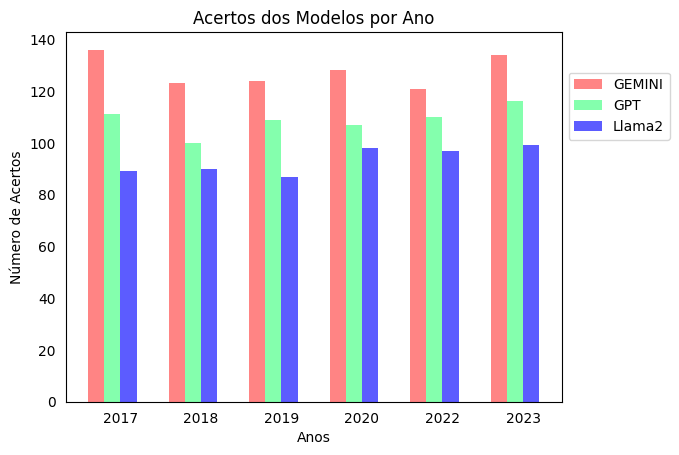

In [103]:
import seaborn as sns

# Configurar o estilo do seaborn para usar a paleta de cores personalizada

# Obter os anos únicos e os alunos únicos
anos = overall_2017_2023_ex2_results['Year'].unique().tolist()
modelos = overall_2017_2023_ex2_results['Model'].unique()

# Criar um dicionário para armazenar os acertos por modelo e ano
acertos = {modelo: [] for modelo in modelos}

# Preencher o dicionário com os acertos para cada modelo e ano
for modelo in modelos:
    for ano in anos:
        # Filtrar o DataFrame para obter os acertos do modelo e ano atual
        acertos_modelo_ano = overall_2017_2023_ex2_results[(overall_2017_2023_ex2_results['Model'] == modelo) & (overall_2017_2023_ex2_results['Year'] == ano)]['Right'].sum()
        # Adicionar os acertos ao dicionário
        acertos[modelo].append(acertos_modelo_ano)

# Configurar o gráfico de barras agrupadas
x = np.arange(len(anos))  # a localização dos rótulos
width = 0.2  # a largura das barras

fig, ax = plt.subplots()

for i, modelo in enumerate(modelos):
    if modelo == 'GPT':
        color = "#66FF99"	
    elif modelo == 'Llama2':
        color = "#3333FF"	
    else:
        color = "#FF6666"
        
    ax.bar(x + i*width, acertos[modelo], width, label=modelo, color=color, alpha=0.8)

# Adicionar legendas, título e rótulos dos eixos
ax.set_ylabel('Número de Acertos')
ax.set_xlabel('Anos')
ax.set_title('Acertos dos Modelos por Ano')
ax.set_xticks(x + (len(modelos)/2)*width)
ax.set_xticklabels(anos)
ax.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8))
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
plt.show()


#### Overall Experiment 2

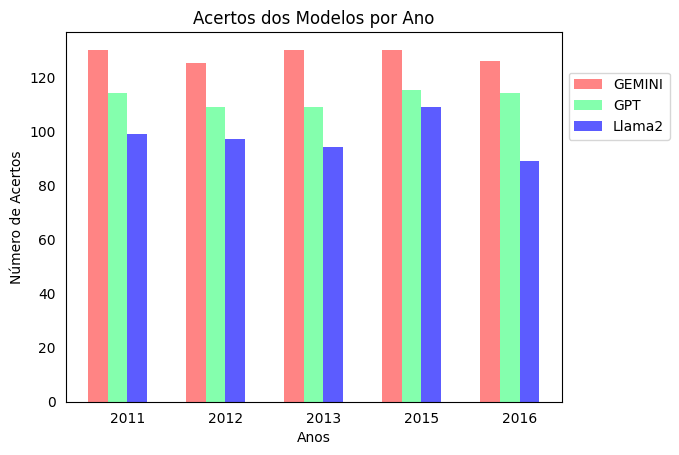

In [104]:
# Obter os anos únicos e os alunos únicos
anos = overall_2011_2016_ex2_results['Year'].unique().tolist()
modelos = overall_2011_2016_ex2_results['Model'].unique()

# Criar um dicionário para armazenar os acertos por modelo e ano
acertos = {modelo: [] for modelo in modelos}

# Preencher o dicionário com os acertos para cada modelo e ano
for modelo in modelos:
    for ano in anos:
        # Filtrar o DataFrame para obter os acertos do modelo e ano atual
        acertos_modelo_ano = overall_2011_2016_ex2_results[(overall_2011_2016_ex2_results['Model'] == modelo) & (overall_2011_2016_ex2_results['Year'] == ano)]['Right'].sum()
        # Adicionar os acertos ao dicionário
        acertos[modelo].append(acertos_modelo_ano)

# Configurar o gráfico de barras agrupadas
x = np.arange(len(anos))  # a localização dos rótulos
width = 0.2  # a largura das barras

fig, ax = plt.subplots()

for i, modelo in enumerate(modelos):
    if modelo == 'GPT':
        color = "#66FF99"	
    elif modelo == 'Llama2':
        color = "#3333FF"	
    else:
        color = "#FF6666"
        
    ax.bar(x + i*width, acertos[modelo], width, label=modelo, color=color, alpha=0.8)

# Adicionar legendas, título e rótulos dos eixos
ax.set_ylabel('Número de Acertos')
ax.set_xlabel('Anos')
ax.set_title('Acertos dos Modelos por Ano')
ax.set_xticks(x + (len(modelos)/2)*width)
ax.set_xticklabels(anos)
ax.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8))
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
plt.show()


In [105]:
overall_ex2_result = pd.concat([overall_2011_2016_ex2_results, overall_2017_2023_ex2_results], ignore_index=True).fillna(0)
overall_ex2_result.to_csv(f'{EXPERIMENTS_PATH}/{EXPERIMENT_NUMBER}/overall_results.csv', index=False)
display(overall_ex2_result)


,Right,Wrong,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer,No answer,Perc_Right
0,130,55,2011,GEMINI,34,11,0,40,5,0,43,7,0,13,32,0,0.0,70.27
1,114,71,2011,GPT,29,16,0,38,7,0,38,12,0,9,36,0,0.0,61.62
2,99,86,2011,Llama2,25,20,0,27,18,0,38,12,0,9,36,0,0.0,53.51
3,125,58,2012,GEMINI,32,12,1,34,11,0,44,6,0,15,29,1,2.0,67.57
4,109,76,2012,GPT,24,21,0,31,14,0,41,9,0,13,32,0,0.0,58.92
5,97,88,2012,Llama2,24,21,0,26,19,0,36,14,0,11,34,0,0.0,52.43
6,130,55,2013,GEMINI,34,11,0,41,4,0,41,9,0,14,31,0,0.0,70.27
7,109,76,2013,GPT,27,18,0,32,13,0,35,15,0,15,30,0,0.0,58.92
8,94,91,2013,Llama2,22,23,0,29,16,0,33,17,0,10,35,0,0.0,50.81
9,130,53,2015,GEMINI,33,12,0,40,5,0,43,5,2,14,31,0,2.0,70.27


In [106]:
model_overall_ex2 = overall_ex2_result.groupby('Model').agg({'Right': 'sum', 'Wrong': 'sum', 'No answer': 'sum', 'CN_true': 'sum', 'CN_false':'sum', 'CN_no_answer':'sum', 'CH_true':'sum', 'CH_false':'sum', 'CH_no_answer':'sum', 'LC_true':'sum', 'LC_false':'sum', 'LC_no_answer': 'sum', 'MT_true':'sum', 'MT_false':'sum', 'MT_no_answer':'sum' }).reset_index()
model_overall_ex2['Total'] = model_overall_ex2['Right'] + model_overall_ex2['Wrong'] + model_overall_ex2['No answer'].apply(lambda x: int(x))
display(model_overall_ex2)

,Model,Right,Wrong,No answer,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer,Total
0,GEMINI,1407,609,14.0,346,144,4,447,46,2,458,86,6,156,333,2,2030
1,GPT,1214,816,0.0,281,213,0,398,97,0,406,144,0,129,362,0,2030
2,Llama2,1048,982,0.0,237,257,0,348,147,0,346,204,0,117,374,0,2030


In [107]:
model_overall_ex2_perc = calculate_perc_area(model_overall_ex2.copy())

185


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,69.31,30.00,0.69,70.04,29.15,0.81,90.3,9.29,0.4,83.27,15.64,1.09,31.77,67.82,0.41
1,GPT,59.80,40.20,0.00,56.88,43.12,0.00,80.4,19.60,0.0,73.82,26.18,0.00,26.27,73.73,0.00
2,Llama2,51.63,48.37,0.00,47.98,52.02,0.00,70.3,29.70,0.0,62.91,37.09,0.00,23.83,76.17,0.00


In [108]:
final_perc_ex2 = pd.concat([enem_2011_ex2_results_perc, enem_2012_ex2_results_perc, enem_2013_ex2_results_perc, enem_2015_ex2_results_perc, enem_2016_ex2_results_perc, enem_2017_ex2_results_perc, enem_2018_ex2_results_perc, enem_2019_ex2_results_perc, enem_2020_ex2_results_perc, enem_2022_ex2_results_perc, enem_2023_ex2_results_perc], ignore_index=True).fillna(0)
final_perc_ex2

,Model,Year,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,2011,70.27,29.73,0.00,75.56,24.44,0.00,88.89,11.11,0.00,86.0,14.0,0.0,28.89,71.11,0.00
1,GPT,2011,61.62,38.38,0.00,64.44,35.56,0.00,84.44,15.56,0.00,76.0,24.0,0.0,20.00,80.00,0.00
2,Llama2,2011,53.51,46.49,0.00,55.56,44.44,0.00,60.00,40.00,0.00,76.0,24.0,0.0,20.00,80.00,0.00
3,GEMINI,2012,67.57,31.35,1.08,71.11,26.67,2.22,75.56,24.44,0.00,88.0,12.0,0.0,33.33,64.44,2.22
4,GPT,2012,58.92,41.08,0.00,53.33,46.67,0.00,68.89,31.11,0.00,82.0,18.0,0.0,28.89,71.11,0.00
5,Llama2,2012,52.43,47.57,0.00,53.33,46.67,0.00,57.78,42.22,0.00,72.0,28.0,0.0,24.44,75.56,0.00
6,GEMINI,2013,70.27,29.73,0.00,75.56,24.44,0.00,91.11,8.89,0.00,82.0,18.0,0.0,31.11,68.89,0.00
7,GPT,2013,58.92,41.08,0.00,60.00,40.00,0.00,71.11,28.89,0.00,70.0,30.0,0.0,33.33,66.67,0.00
8,Llama2,2013,50.81,49.19,0.00,48.89,51.11,0.00,64.44,35.56,0.00,66.0,34.0,0.0,22.22,77.78,0.00
9,GEMINI,2015,70.27,28.65,1.08,73.33,26.67,0.00,88.89,11.11,0.00,86.0,10.0,4.0,31.11,68.89,0.00


In [109]:
final_model_ex2_perc = final_perc_ex2.groupby('Model').agg({'Right_perc': 'mean', 'Wrong_perc': 'mean', 'No_answer_perc': 'mean', 'CN_Right_perc': 'mean', 'CN_Wrong_perc':'mean', 'CN_No_answer_perc':'mean', 'CH_Right_perc':'mean', 'CH_Wrong_perc':'mean', 'CH_No_answer_perc':'mean', 'LC_Right_perc':'mean', 'LC_Wrong_perc':'mean', 'LC_No_answer_perc':'mean', 'MT_Right_perc':'mean', 'MT_Wrong_perc':'mean', 'MT_No_answer_perc':'mean' }).reset_index()
# final_model_ex2_perc['Total'] = final_model_ex2_perc['Right'] + final_model_ex2_perc['Wrong'] + final_model_ex2_perc['No answer'].apply(lambda x: int(x))
display(final_model_ex2_perc)

,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,69.310909,30.000000,0.69,70.027273,29.155455,0.817273,90.303636,9.291818,0.403636,83.272727,15.636364,1.090909,31.785455,67.805455,0.408182
1,GPT,59.800000,40.200000,0.00,56.871818,43.128182,0.000000,80.402727,19.597273,0.000000,73.818182,26.181818,0.000000,26.275455,73.724545,0.000000
2,Llama2,51.627273,48.372727,0.00,47.993636,52.006364,0.000000,70.302727,29.697273,0.000000,62.909091,37.090909,0.000000,23.840909,76.159091,0.000000


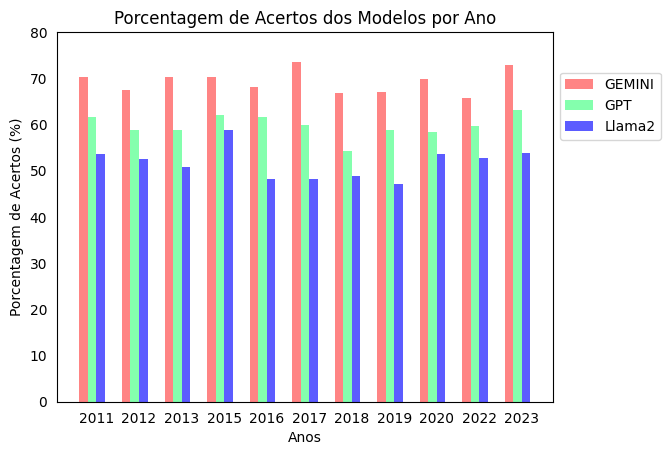

In [110]:
# Obter os anos únicos e os alunos únicos
anos = overall_ex2_result['Year'].unique().tolist()
modelos = overall_ex2_result['Model'].unique()

# Criar um dicionário para armazenar os acertos por modelo e ano
acertos = {modelo: [] for modelo in modelos}

# Preencher o dicionário com os acertos para cada modelo e ano
for modelo in modelos:
    for ano in anos:
        
        total = overall_ex2_result[(overall_ex2_result['Model'] == modelo) & (overall_ex2_result['Year'] == ano)]['Right'] + overall_ex2_result[(overall_ex2_result['Model'] == modelo) & (overall_ex2_result['Year'] == ano)]['Wrong'] + overall_ex2_result[(overall_ex2_result['Model'] == modelo) & (overall_ex2_result['Year'] == ano)]['No answer']
        # Filtrar o DataFrame para obter os acertos do modelo e ano atual
        acertos_modelo_ano = (overall_ex2_result[(overall_ex2_result['Model'] == modelo) & (overall_ex2_result['Year'] == ano)]['Right']/total*100).sum()
        # Adicionar os acertos ao dicionário
        acertos[modelo].append(acertos_modelo_ano)

# Configurar o gráfico de barras agrupadas
x = np.arange(len(anos))  # a localização dos rótulos
width = 0.2  # a largura das barras

fig, ax = plt.subplots()

for i, modelo in enumerate(modelos):
    if modelo == 'GPT':
        color = "#66FF99"	
    elif modelo == 'Llama2':
        color = "#3333FF"	
    else:
        color = "#FF6666"
        
    ax.bar(x + i*width, acertos[modelo], width, label=modelo, color=color, alpha=0.8)

# Adicionar legendas, título e rótulos dos eixos
ax.set_ylabel('Porcentagem de Acertos (%)')
ax.set_xlabel('Anos')
ax.set_title('Porcentagem de Acertos dos Modelos por Ano')
ax.set_xticks(x + (len(modelos)/2)*width)
ax.set_xticklabels(anos)
ax.set_yticks(np.arange(0, 81, 10))
ax.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8))
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
plt.show()


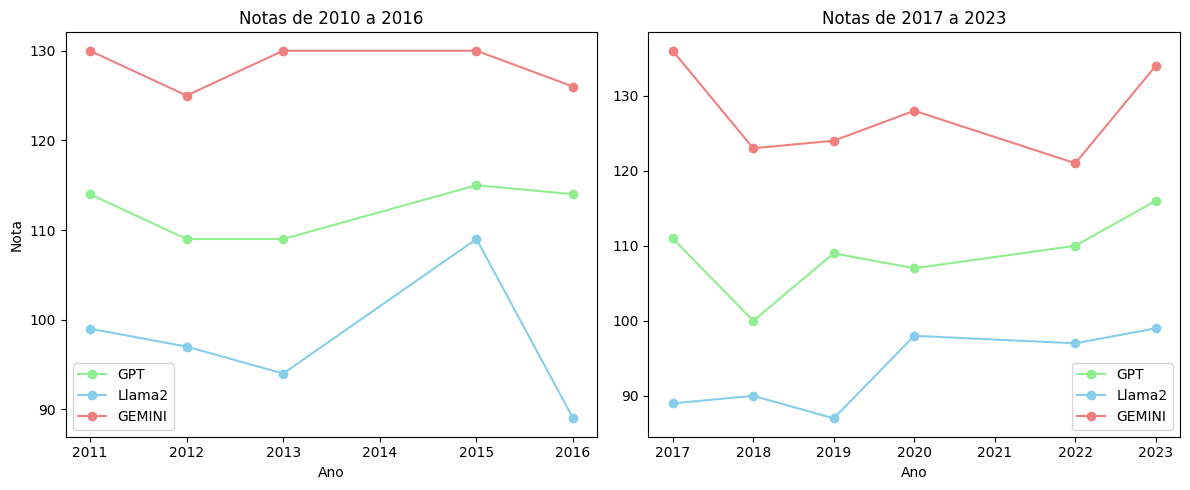

In [111]:
# Supondo que você tenha os dados de notas dos três alunos para cada ano em cada período de tempo
anos_periodo1 = [2011,2012,2013,2015,2016]  # Anos para o primeiro período
anos_periodo2 = [2017,2018,2019,2020,2022,2023]  # Anos para o segundo período

print()
# Notas dos alunos para o primeiro período (2010-2016)
aluno1_periodo1 = overall_2011_2016_ex2_results.query('Model == "GPT"')['Right'].tolist()
aluno2_periodo1 = overall_2011_2016_ex2_results.query('Model == "Llama2"')['Right'].tolist()
aluno3_periodo1 = overall_2011_2016_ex2_results.query('Model == "GEMINI"')['Right'].tolist()

# Notas dos alunos para o segundo período (2017-2023)
aluno1_periodo2 = overall_2017_2023_ex2_results.query('Model == "GPT"')['Right'].tolist()
aluno2_periodo2 = overall_2017_2023_ex2_results.query('Model == "Llama2"')['Right'].tolist()
aluno3_periodo2 = overall_2017_2023_ex2_results.query('Model == "GEMINI"')['Right'].tolist()

# Configurar o layout dos subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotar o primeiro gráfico (2010-2016)
axs[0].plot(anos_periodo1, aluno1_periodo1, label='GPT', marker='o', color='lightgreen')
axs[0].plot(anos_periodo1, aluno2_periodo1, label='Llama2', marker='o', color='skyblue')
axs[0].plot(anos_periodo1, aluno3_periodo1, label='GEMINI', marker='o', color='lightcoral')
axs[0].set_title('Notas de 2010 a 2016')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Nota')
axs[0].legend()

# Plotar o segundo gráfico (2017-2023)
axs[1].plot(anos_periodo2, aluno1_periodo2, label='GPT', marker='o', color='lightgreen')
axs[1].plot(anos_periodo2, aluno2_periodo2, label='Llama2', marker='o',color='skyblue')
axs[1].plot(anos_periodo2, aluno3_periodo2, label='GEMINI', marker='o',color='lightcoral')
axs[1].set_title('Notas de 2017 a 2023')
axs[1].set_xlabel('Ano')
axs[1].legend()

# Ajustar o layout dos subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


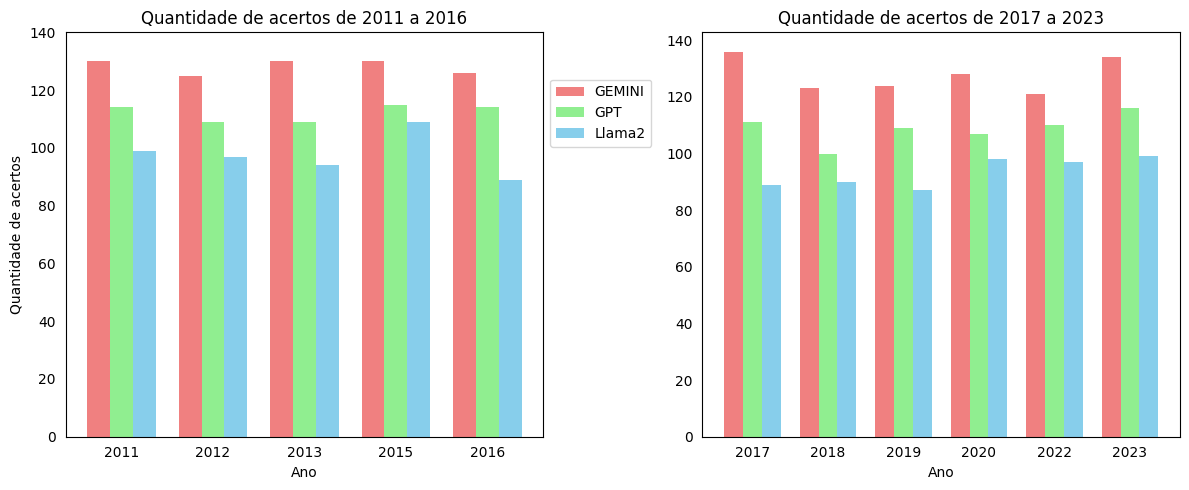

In [112]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Definir a largura das barras
largura_barra = 0.25

# Criar array de índices para as barras
indices_periodo1 = np.arange(len(anos_periodo1))
indices_periodo2 = np.arange(len(anos_periodo2))

# Plotar o primeiro gráfico (2011-2016)
axs[0].bar(indices_periodo1 - largura_barra, aluno3_periodo1, largura_barra, label='GEMINI',color='lightcoral')
axs[0].bar(indices_periodo1, aluno1_periodo1, largura_barra, label='GPT', color='lightgreen')
axs[0].bar(indices_periodo1 + largura_barra, aluno2_periodo1, largura_barra, label='Llama2', color='skyblue')
axs[0].set_title('Quantidade de acertos de 2011 a 2016')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Quantidade de acertos')
axs[0].set_xticks(indices_periodo1)
axs[0].set_xticklabels(anos_periodo1)
axs[0].set_yticks(range(0,141,20))
axs[0].legend()

# Plotar o segundo gráfico (2017-2023)
axs[1].bar(indices_periodo2 - largura_barra, aluno3_periodo2, largura_barra, label='GEMINI',color='lightcoral')
axs[1].bar(indices_periodo2, aluno1_periodo2, largura_barra, label='GPT',color='lightgreen')
axs[1].bar(indices_periodo2 + largura_barra, aluno2_periodo2, largura_barra, label='Llama2',color='skyblue')
axs[1].set_title('Quantidade de acertos de 2017 a 2023')
axs[1].set_xlabel('Ano')
# axs[1].set_ylabel('Quantidade de acertos')
axs[1].set_xticks(indices_periodo2)
axs[1].set_xticklabels(anos_periodo2)

axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.8))
axs[0].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
axs[1].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

# Ajustar o layout dos subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()

In [113]:
# from time import sleep
# years = [2011, 2012, 2013, 2015, 2016, 2017, 2018, 2019, 2020, 2022, 2023]
# for i in years:
#     x = overall_ex2_result.query(f'Year == {i}').sort_values(by='Right', ascending=False)
#     display(x)
#     input('Press enter to continue')

### Comparando resultados dos dois experimentos

#### Comparações gerais

In [114]:
f_overall = overall_result.copy()
f_overall_ex2 = overall_ex2_result.copy()

f_overall['Temperature'] = np.where(f_overall['Model'] == 'GEMINI', 0.9, 1.0)
f_overall_ex2['Temperature'] = 0.0

f_final = pd.concat([f_overall, f_overall_ex2], ignore_index=True).fillna(0).sort_values(by=['Year','Model'])
f_final.to_csv(f'{EXPERIMENTS_PATH}/f_final_results.csv', index=False)

In [115]:
display(model_overall)
display(model_overall_ex2)

,Model,Right,Wrong,No answer,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer,Total,Total + Anuladas
0,GEMINI,1395,612,23.0,346,144,4,433,54,8,451,88,11,165,326,0,2030,2035
1,GPT,1167,863,0.0,270,224,0,387,108,0,388,162,0,122,369,0,2030,2035
2,Llama2,1026,1004,0.0,230,264,0,340,155,0,346,204,0,110,381,0,2030,2035


,Model,Right,Wrong,No answer,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer,Total
0,GEMINI,1407,609,14.0,346,144,4,447,46,2,458,86,6,156,333,2,2030
1,GPT,1214,816,0.0,281,213,0,398,97,0,406,144,0,129,362,0,2030
2,Llama2,1048,982,0.0,237,257,0,348,147,0,346,204,0,117,374,0,2030


In [116]:
display(model_overall_perc)
display(model_overall_ex2_perc)

,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,68.72,30.15,1.13,70.04,29.15,0.81,87.47,10.91,1.62,82.00,16.00,2.0,33.60,66.40,0.0
1,GPT,57.49,42.51,0.00,54.66,45.34,0.00,78.18,21.82,0.00,70.55,29.45,0.0,24.85,75.15,0.0
2,Llama2,50.54,49.46,0.00,46.56,53.44,0.00,68.69,31.31,0.00,62.91,37.09,0.0,22.40,77.60,0.0


,Model,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,69.31,30.00,0.69,70.04,29.15,0.81,90.3,9.29,0.4,83.27,15.64,1.09,31.77,67.82,0.41
1,GPT,59.80,40.20,0.00,56.88,43.12,0.00,80.4,19.60,0.0,73.82,26.18,0.00,26.27,73.73,0.00
2,Llama2,51.63,48.37,0.00,47.98,52.02,0.00,70.3,29.70,0.0,62.91,37.09,0.00,23.83,76.17,0.00


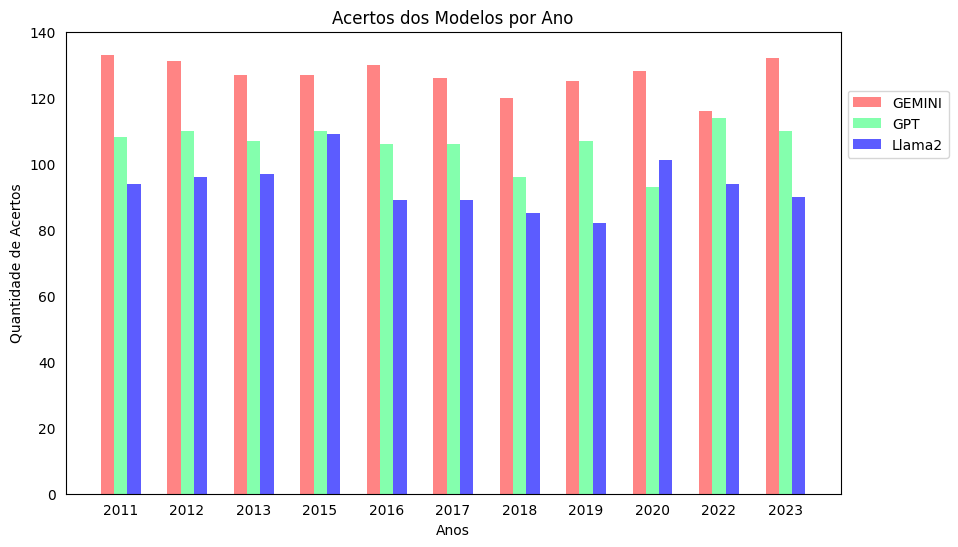

In [117]:
import seaborn as sns

# Configurar o estilo do seaborn para usar a paleta de cores personalizada

# Obter os anos únicos e os alunos únicos
anos = overall_result['Year'].unique().tolist()
modelos = overall_result['Model'].unique()

# Criar um dicionário para armazenar os acertos por modelo e ano
acertos = {modelo: [] for modelo in modelos}

# Preencher o dicionário com os acertos para cada modelo e ano
for modelo in modelos:
    for ano in anos:
        # Filtrar o DataFrame para obter os acertos do modelo e ano atual
        acertos_modelo_ano = overall_result[(overall_result['Model'] == modelo) & (overall_result['Year'] == ano)]['Right'].sum()
        # Adicionar os acertos ao dicionário
        acertos[modelo].append(acertos_modelo_ano)

# Configurar o gráfico de barras agrupadas
x = np.arange(len(anos))  # a localização dos rótulos
width = 0.2  # a largura das barras

fig, ax = plt.subplots(figsize=(10, 6))

for i, modelo in enumerate(modelos):
    if modelo == 'GPT':
        color = "#66FF99"	
    elif modelo == 'Llama2':
        color = "#3333FF"	
    else:
        color = "#FF6666"
        
    ax.bar(x + i*width, acertos[modelo], width, label=modelo, color=color, alpha=0.8)

# Adicionar legendas, título e rótulos dos eixos
ax.set_ylabel('Quantidade de Acertos')
ax.set_xlabel('Anos')
ax.set_title('Acertos dos Modelos por Ano')
ax.set_xticks(x + (len(modelos)/2)*(width - 0.07))
ax.set_xticklabels(anos)
ax.set_yticks(range(0,141,20))

ax.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8))
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
plt.show()


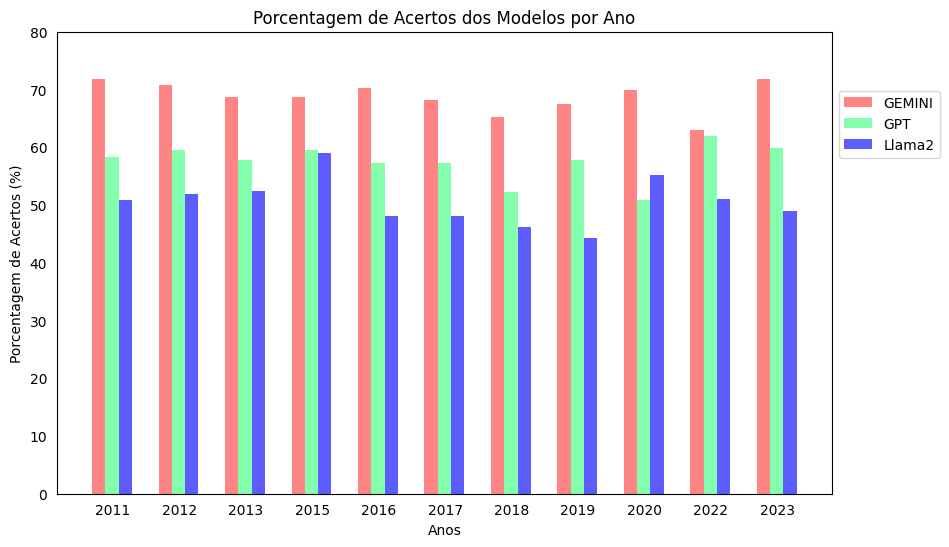

In [118]:
# Obter os anos únicos e os alunos únicos
anos = overall_result['Year'].unique().tolist()
modelos = overall_result['Model'].unique()

# Criar um dicionário para armazenar os acertos por modelo e ano
acertos = {modelo: [] for modelo in modelos}

# Preencher o dicionário com os acertos para cada modelo e ano
for modelo in modelos:
    for ano in anos:
        
        total = overall_result[(overall_result['Model'] == modelo) & (overall_result['Year'] == ano)]['Right'] + overall_result[(overall_result['Model'] == modelo) & (overall_result['Year'] == ano)]['Wrong'] + overall_result[(overall_result['Model'] == modelo) & (overall_result['Year'] == ano)]['No answer']
        # Filtrar o DataFrame para obter os acertos do modelo e ano atual
        acertos_modelo_ano = (overall_result[(overall_result['Model'] == modelo) & (overall_result['Year'] == ano)]['Right']/total*100).sum()
        # Adicionar os acertos ao dicionário
        acertos[modelo].append(acertos_modelo_ano)

# Configurar o gráfico de barras agrupadas
x = np.arange(len(anos))  # a localização dos rótulos
width = 0.2  # a largura das barras

fig, ax = plt.subplots(figsize=(10, 6))

for i, modelo in enumerate(modelos):
    if modelo == 'GPT':
        color = "#66FF99"	
    elif modelo == 'Llama2':
        color = "#3333FF"	
    else:
        color = "#FF6666"
        
    ax.bar(x + i*width, acertos[modelo], width, label=modelo, color=color, alpha=0.8)

# Adicionar legendas, título e rótulos dos eixos
ax.set_ylabel('Porcentagem de Acertos (%)')
ax.set_xlabel('Anos')
ax.set_title('Porcentagem de Acertos dos Modelos por Ano')
ax.set_xticks(x + (len(modelos)/2)*(width - 0.06))
ax.set_xticklabels(anos)
ax.set_yticks(np.arange(0, 81, 10))
ax.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8))
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
plt.show()

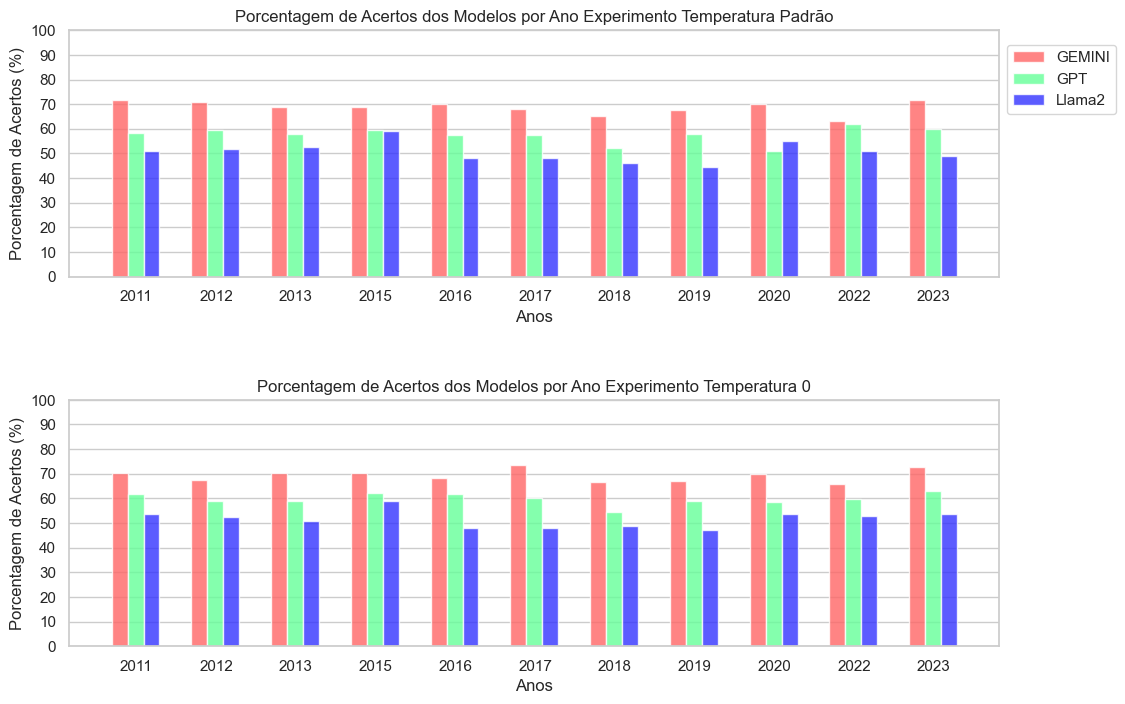

In [152]:
# Obter os anos únicos e os alunos únicos
anos = overall_result['Year'].unique().tolist()
modelos = overall_result['Model'].unique()

# Criar um dicionário para armazenar os acertos por modelo e ano
acertos = {modelo: [] for modelo in modelos}
acertos2 = {modelo: [] for modelo in modelos}

# Preencher o dicionário com os acertos para cada modelo e ano
for modelo in modelos:
    for ano in anos:
        
        total = overall_result[(overall_result['Model'] == modelo) & (overall_result['Year'] == ano)]['Right'] + overall_result[(overall_result['Model'] == modelo) & (overall_result['Year'] == ano)]['Wrong'] + overall_result[(overall_result['Model'] == modelo) & (overall_result['Year'] == ano)]['No answer']
        # Filtrar o DataFrame para obter os acertos do modelo e ano atual
        acertos_modelo_ano = (overall_result[(overall_result['Model'] == modelo) & (overall_result['Year'] == ano)]['Right']/total*100).sum()
        # Adicionar os acertos ao dicionário
        acertos[modelo].append(acertos_modelo_ano)
        acertos_modelo_ano_2 = (overall_ex2_result[(overall_ex2_result['Model'] == modelo) & (overall_ex2_result['Year'] == ano)]['Right']/total*100).sum()
        # Adicionar os acertos ao dicionário
        acertos2[modelo].append(acertos_modelo_ano_2)

# Configurar o gráfico de barras agrupadas
x = np.arange(len(anos))  # a localização dos rótulos
width = 0.2  # a largura das barras

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12, 8))

for i, modelo in enumerate(modelos):
    if modelo == 'GPT':
        color = "#66FF99"	
    elif modelo == 'Llama2':
        color = "#3333FF"	
    else:
        color = "#FF6666"
        
    ax1.bar(x + i*width, acertos[modelo], width, label=modelo, color=color, alpha=0.8)
    ax2.bar(x + i*width, acertos2[modelo], width, label=modelo, color=color, alpha=0.8)

# Adicionar legendas, título e rótulos dos eixos
ax1.set_ylabel('Porcentagem de Acertos (%)')
ax1.set_xlabel('Anos')
ax1.set_title('Porcentagem de Acertos dos Modelos por Ano Experimento Temperatura Padrão')
ax1.set_xticks(x + (len(modelos)/2)*(width - 0.06))
ax1.set_xticklabels(anos)
ax1.set_yticks(np.arange(0, 101, 10))
ax1.legend()
ax1.grid(axis='x')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.8))
ax1.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)


ax2.set_ylabel('Porcentagem de Acertos (%)')
ax2.set_xlabel('Anos')
ax2.set_title('Porcentagem de Acertos dos Modelos por Ano Experimento Temperatura 0')
ax2.set_xticks(x + (len(modelos)/2)*(width - 0.06))
ax2.set_xticklabels(anos)
ax2.set_yticks(np.arange(0, 101, 10))
ax2.grid(axis='x')
ax2.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
plt.subplots_adjust(hspace=0.5)
plt.show()

In [120]:
teste = f_final.copy()
teste['Temperature'] = np.where(teste['Temperature'] != 0.0, "Padrão", 0)
print(teste.columns)

# g = (ggplot(overall_result, aes(x='Year', y='Right', fill='Model')) +    
#  geom_bar(stat='identity', position='dodge') +    
#  labs(title='Notas dos alunos') +
#  geom_point(alpha=0.1) +
#  facet_wrap("Model")
#  )

# # display(teste)
# display(g)


Index(['Right', 'Wrong', 'No answer', 'Year', 'Model', 'CN_true', 'CN_false',
       'CN_no_answer', 'CH_true', 'CH_false', 'CH_no_answer', 'LC_true',
       'LC_false', 'LC_no_answer', 'MT_true', 'MT_false', 'MT_no_answer',
       'Perc_Right', 'Temperature'],
      dtype='object')


In [121]:
display(teste)

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer,Perc_Right,Temperature
0,133,51,1.0,2011,GEMINI,32,13,0,41,3,1,45,5,0,15,30,0,71.89,Padrão
33,130,55,0.0,2011,GEMINI,34,11,0,40,5,0,43,7,0,13,32,0,70.27,0
1,108,77,0.0,2011,GPT,29,16,0,33,12,0,36,14,0,10,35,0,58.38,Padrão
34,114,71,0.0,2011,GPT,29,16,0,38,7,0,38,12,0,9,36,0,61.62,0
2,94,91,0.0,2011,Llama2,22,23,0,26,19,0,38,12,0,8,37,0,50.81,Padrão
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,134,48,2.0,2023,GEMINI,31,14,0,45,0,0,43,6,1,15,28,1,72.83,0
31,110,74,0.0,2023,GPT,23,22,0,34,11,0,40,10,0,13,31,0,59.78,Padrão
64,116,68,0.0,2023,GPT,23,22,0,39,6,0,39,11,0,15,29,0,63.04,0
32,90,94,0.0,2023,Llama2,17,28,0,30,15,0,35,15,0,8,36,0,48.91,Padrão


C:\Users\eulal\AppData\Local\Temp\ipykernel_7804\3301810967.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

C:\Users\eulal\AppData\Local\Temp\ipykernel_7804\3301810967.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



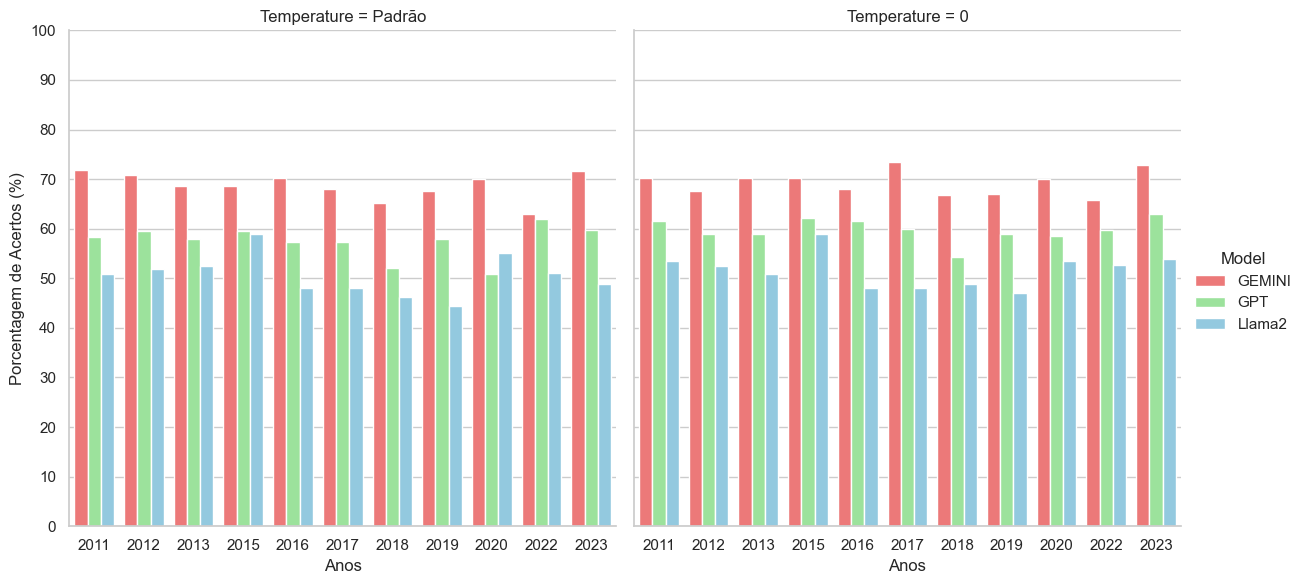

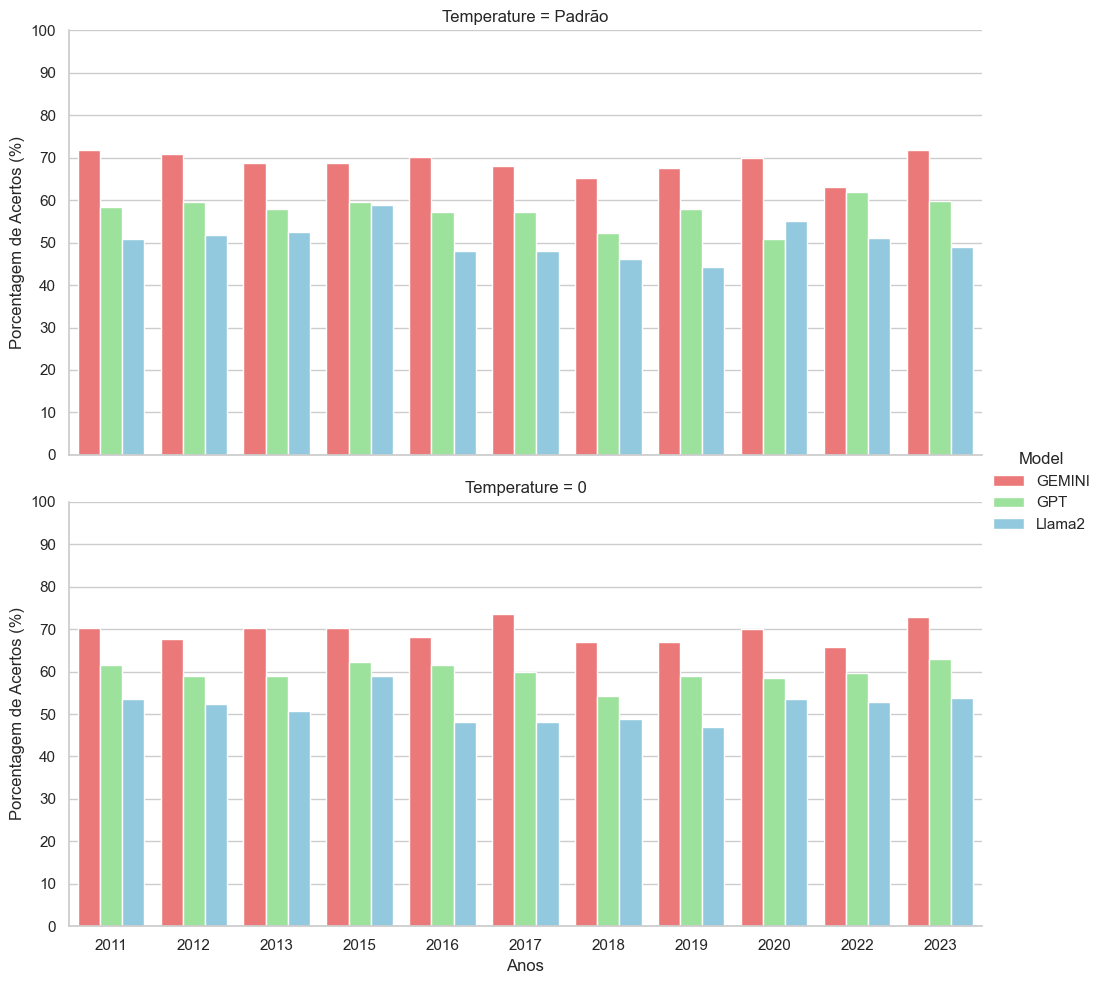

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

cores_personalizadas = {"Llama2": "skyblue", "GPT": "lightgreen", "GEMINI": (255/255, 102/255, 102/255)}

sns.set_theme(style="whitegrid")

# Criar o FacetGrid com base na coluna "Temperature"
g = sns.catplot(
    data=teste, kind="bar",
    x="Year", y="Perc_Right", hue="Model",  alpha=1, height=6,
    palette=cores_personalizadas,col="Temperature", ci=None
)


g2 = sns.catplot(
    data=teste, kind="bar",
    x="Year", y="Perc_Right", hue="Model",  alpha=1, height=5, aspect=2,
    palette=cores_personalizadas,row="Temperature", ci=None
)
# Adicionar título para cada subgráfico
g.set_titles(col_template="Temperature = {col_name}")

# Adicionar rótulos aos eixos
g.set_axis_labels('Anos', 'Porcentagem de Acertos (%)')
g2.set_axis_labels('Anos', 'Porcentagem de Acertos (%)')



# Definir os ticks no eixo y para cada subgráfico do FacetGrid
for ax in g.axes.flat:
    ax.set(ylim=(0, 100))
    ax.set(yticks=range(0, 101, 10))

for ax in g2.axes.flat:
    ax.set(ylim=(0, 100))
    ax.set(yticks=range(0, 101, 10))

plt.show()


In [123]:
gemini_exps_diff = model_overall_ex2.iloc[0,1:] - model_overall.iloc[0,1:]
gemini_exps_diff = pd.DataFrame(gemini_exps_diff).transpose()
gemini_exps_diff['Model'] = 'GEMINI'
display(gemini_exps_diff)  

,CH_false,CH_no_answer,CH_true,CN_false,CN_no_answer,CN_true,LC_false,LC_no_answer,LC_true,MT_false,MT_no_answer,MT_true,No answer,Right,Total,Total + Anuladas,Wrong,Model
0,-8,-6,14,0,0,0,-2,-5,7,7,2,-9,-9.0,12,0,NaN,-3,GEMINI


In [124]:
gpt_exps_diff = model_overall_ex2.iloc[1,1:] - model_overall.iloc[1,1:]
gpt_exps_diff = pd.DataFrame(gpt_exps_diff).transpose()
gpt_exps_diff['Model'] = 'GPT'
display(gpt_exps_diff)  

,CH_false,CH_no_answer,CH_true,CN_false,CN_no_answer,CN_true,LC_false,LC_no_answer,LC_true,MT_false,MT_no_answer,MT_true,No answer,Right,Total,Total + Anuladas,Wrong,Model
1,-11,0,11,-11,0,11,-18,0,18,-7,0,7,0.0,47,0,NaN,-47,GPT


In [125]:
llama_exps_diff = model_overall_ex2.iloc[2,1:] - model_overall.iloc[2,1:]
llama_exps_diff = pd.DataFrame(llama_exps_diff).transpose()
llama_exps_diff['Model'] = 'Llama2'
display(llama_exps_diff)  

,CH_false,CH_no_answer,CH_true,CN_false,CN_no_answer,CN_true,LC_false,LC_no_answer,LC_true,MT_false,MT_no_answer,MT_true,No answer,Right,Total,Total + Anuladas,Wrong,Model
2,-8,0,8,-7,0,7,0,0,0,-7,0,7,0.0,22,0,NaN,-22,Llama2


In [126]:
exps_diff = pd.concat([gemini_exps_diff, gpt_exps_diff, llama_exps_diff], ignore_index=True).fillna(0)
exps_diff


,CH_false,CH_no_answer,CH_true,CN_false,CN_no_answer,CN_true,LC_false,LC_no_answer,LC_true,MT_false,MT_no_answer,MT_true,No answer,Right,Total,Total + Anuladas,Wrong,Model
0,-8,-6,14,0,0,0,-2,-5,7,7,2,-9,-9.0,12,0,0,-3,GEMINI
1,-11,0,11,-11,0,11,-18,0,18,-7,0,7,0.0,47,0,0,-47,GPT
2,-8,0,8,-7,0,7,0,0,0,-7,0,7,0.0,22,0,0,-22,Llama2


In [127]:
exps_diff_perc = model_overall_ex2_perc.iloc[:,1:] - model_overall_perc.iloc[:,1:]
exps_diff_perc = pd.DataFrame(exps_diff_perc)
exps_diff_perc['Model'] = model_overall_ex2['Model']
display(exps_diff_perc)

,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc,Model
0,0.59,-0.15,-0.44,0.00,0.00,0.0,2.83,-1.62,-1.22,1.27,-0.36,-0.91,-1.83,1.42,0.41,GEMINI
1,2.31,-2.31,0.00,2.22,-2.22,0.0,2.22,-2.22,0.00,3.27,-3.27,0.00,1.42,-1.42,0.00,GPT
2,1.09,-1.09,0.00,1.42,-1.42,0.0,1.61,-1.61,0.00,0.00,0.00,0.00,1.43,-1.43,0.00,Llama2


#### Comparações por áreas

In [128]:
overall_result

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer,Perc_Right
0,133,51,1.0,2011,GEMINI,32,13,0,41,3,1,45,5,0,15,30,0,71.89
1,108,77,0.0,2011,GPT,29,16,0,33,12,0,36,14,0,10,35,0,58.38
2,94,91,0.0,2011,Llama2,22,23,0,26,19,0,38,12,0,8,37,0,50.81
3,131,52,2.0,2012,GEMINI,37,8,0,32,11,2,42,8,0,20,25,0,70.81
4,110,75,0.0,2012,GPT,25,20,0,31,14,0,36,14,0,18,27,0,59.46
5,96,89,0.0,2012,Llama2,25,20,0,25,20,0,34,16,0,12,33,0,51.89
6,127,55,3.0,2013,GEMINI,33,11,1,41,4,0,40,8,2,13,32,0,68.65
7,107,78,0.0,2013,GPT,26,19,0,33,12,0,35,15,0,13,32,0,57.84
8,97,88,0.0,2013,Llama2,23,22,0,31,14,0,33,17,0,10,35,0,52.43
9,127,54,4.0,2015,GEMINI,33,12,0,37,6,2,42,6,2,15,30,0,68.65


In [129]:
overall_ex2_result

,Right,Wrong,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer,No answer,Perc_Right
0,130,55,2011,GEMINI,34,11,0,40,5,0,43,7,0,13,32,0,0.0,70.27
1,114,71,2011,GPT,29,16,0,38,7,0,38,12,0,9,36,0,0.0,61.62
2,99,86,2011,Llama2,25,20,0,27,18,0,38,12,0,9,36,0,0.0,53.51
3,125,58,2012,GEMINI,32,12,1,34,11,0,44,6,0,15,29,1,2.0,67.57
4,109,76,2012,GPT,24,21,0,31,14,0,41,9,0,13,32,0,0.0,58.92
5,97,88,2012,Llama2,24,21,0,26,19,0,36,14,0,11,34,0,0.0,52.43
6,130,55,2013,GEMINI,34,11,0,41,4,0,41,9,0,14,31,0,0.0,70.27
7,109,76,2013,GPT,27,18,0,32,13,0,35,15,0,15,30,0,0.0,58.92
8,94,91,2013,Llama2,22,23,0,29,16,0,33,17,0,10,35,0,0.0,50.81
9,130,53,2015,GEMINI,33,12,0,40,5,0,43,5,2,14,31,0,2.0,70.27


### Resultados

<ul>
<li> Prova de 2013 em ambos os experimentos apresentou os piores resultados disparados, sendo o pior ano para todos os modelos
<li> Para o segundo experimento TODOS os anos o ranking de modelos seguiu o mesmo padrão GEMINI > GPT > Llama2
<li> Para o primeiro experimento GEMINI ganhou as edições 2011, 2012,2013,2015, 2016,2017,2018,2019,2020,2023 e GPT foi o que obteve mais acertos na prova de 2022
<li> Ainda no primeiro experimento houveram algumas variancia na terceira e segunda posição dos rankings
<ul>
<li> 2011,2012,2013,2015,2016,2017,2018,2019 e 2023 GEMINI > GPT > Llama2
<li> 2020 GEMINI > Llama2 > GPT
<li> 2022 GPT > Llama2 > GEMINI
</ul>

<li> De 2035 questões, 2030 questões foram consideradas, pois 5 foram tiveram foram anuladas pelo INEP, no experimento 1, GEMINI obteve uma porcentagem de acerto de aproximadamente 64.14%, aproximadamento 34.78% de erro e 1.08% de questões não foram respondidas

<ul>
<li> Das 4 áreas no geral LC(82.00% acertos	16.00% erros	2.0% não respondidas(11 questões)) > CH(78.18& acertos	20.20% erros	1.62% não respondidas(8 questões)) > CN (60.53% acertos	38.87% erros	0.61% não respondidas(3 questões))> MT (33.33% acertos	66.67% erros	0.0% não respondidas)
<li> GEMINI foi o único modelo a não responder questões, devido a questões de problemas com o modelo interpretar o conteúdo da questões como conteúdo sensível 
</ul>

<li> De 2035 questões, 2030 questões foram consideradas, pois 5 foram tiveram foram anuladas pelo INEP, no experimento 2, GEMINI obteve uma porcentagem de acerto de aproximadamente 66.50%, aproximadamento 32.81% de erro e 0.69% de questões não foram respondidas

<ul>
<li> Das 4 áreas no geral CH(84.04% acertos	15.56% erros	0.4% não respondidas(2 questões)) > LC(83.27% acertos	15.64% erros	1.09% não respondidas(6 questões)) >  CN (64.78% acertos	34.41% erros	0.81% não respondidas(4 questões))> MT (31.77% acertos	67.82% erros	0.41% (2 questões) não respondidas)
</ul>

<li> De 2035 questões, 2030 questões foram consideradas, pois 5 foram tiveram foram anuladas pelo INEP, no experimento 1, GPT obteve uma porcentagem de acerto de aproximadamente 55.42%, aproximadamente 44.58% de erro e 0% de questões não respondida

<ul>
<li> Das 4 áreas no geral  CH(73.13% acertos	26.87% erros) > LC(70.55% acertos	29.45% erros) > CN (51.21% acertos	48.79% erros	)> MT (24.85% acertos	75.15% erros)
</ul>

<li> De 2035 questões, 2030 questões foram consideradas, pois 5 foram tiveram foram anuladas pelo INEP, no experimento 2, GPT obteve uma porcentagem de acerto de aproximadamente 57.73%, aproximadamente 42.27% de erro e 0% de questões não respondidas

<ul>
<li> Das 4 áreas no geral  CH(75.56% acertos	24.44% erros) > LC(73.82% acertos	26.18% erros) > CN (53.24% acertos	46.76% erros	)> MT (26.27% acertos	73.73% erros)
</ul>

<li> De 2035 questões, 2030 questões foram consideradas, pois 5 foram tiveram foram anuladas pelo INEP, no experimento 1, o Llama2 obteve 48.57% de acertos	51.43 % de erros e 0 questões não respondidas

<ul>
<li> Das 4 áreas no geral  CH(64.44% acertos	35.56% erros) > LC(62.91% acertos	37.09% erros) > CN (42.71% acertos	57.29% erros	)> MT (22.40% acertos	77.60% erros)
</ul>

<li> De 2035 questões, 2030 questões foram consideradas, pois 5 foram tiveram foram anuladas pelo INEP, no experimento 2, o Llama2 obteve 49.90% de acertos	50.10 % de erros e 0 questões não respondidas	

<ul>
<li> Das 4 áreas no geral  CH(66.26% acertos	33.74% erros) > LC(62.91% acertos	37.09% erros) > CN (44.94% acertos	55.06% erros	)> MT (23.83% acertos	76.17% erros)
</ul>

<ul>
<li> Matemática foi a área que os modelos tiveram os piores desempenhos e isso se deu, muito provavelmente, devido ao fato que o treinamento dos modelos pode até ter envolvido questões de matemática, trabalhos matemáticos e livros de matemática (artigo sobre treinamento do GPT https://arxiv.org/pdf/2005.14165.pdf), entretanto, no Enem o caráter interpretativo das questões em qualquer que seja a área é muito grande. Assim, é provavel que esse resultado seja consequência dos modelos não terem sido confrontados, nem treinados com questões as quais se fazia necessário tamanho grau de interpretação para se obter as respostas. Mas, em contrapartida, ainda sim os resultados obtidos pelos modelo ainda foram superiores a média de participantes da prova, que foi de .
</ul>

### Resultados análise por área
<ul>
<li> CN e CH em 2013 no exp2 caíram drasticamente, enquanto matemática e linguagens mantiveram na proporção que outro anos

#### Valores brutos

In [130]:
overall_ex2_result

,Right,Wrong,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer,No answer,Perc_Right
0,130,55,2011,GEMINI,34,11,0,40,5,0,43,7,0,13,32,0,0.0,70.27
1,114,71,2011,GPT,29,16,0,38,7,0,38,12,0,9,36,0,0.0,61.62
2,99,86,2011,Llama2,25,20,0,27,18,0,38,12,0,9,36,0,0.0,53.51
3,125,58,2012,GEMINI,32,12,1,34,11,0,44,6,0,15,29,1,2.0,67.57
4,109,76,2012,GPT,24,21,0,31,14,0,41,9,0,13,32,0,0.0,58.92
5,97,88,2012,Llama2,24,21,0,26,19,0,36,14,0,11,34,0,0.0,52.43
6,130,55,2013,GEMINI,34,11,0,41,4,0,41,9,0,14,31,0,0.0,70.27
7,109,76,2013,GPT,27,18,0,32,13,0,35,15,0,15,30,0,0.0,58.92
8,94,91,2013,Llama2,22,23,0,29,16,0,33,17,0,10,35,0,0.0,50.81
9,130,53,2015,GEMINI,33,12,0,40,5,0,43,5,2,14,31,0,2.0,70.27


In [131]:
overall_ex2_result.describe()

,Right,Wrong,Year,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer,No answer,Perc_Right
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,111.181818,72.939394,2016.909091,26.181818,18.606061,0.121212,36.151515,8.787879,0.060606,36.666667,13.151515,0.181818,12.181818,32.393939,0.060606,0.424242,60.246061
std,14.464298,14.945608,3.835391,4.857047,4.980834,0.415149,4.842012,4.910178,0.242306,5.627314,5.788573,0.527645,2.866341,3.030464,0.242306,0.791766,7.830547
min,87.000000,48.000000,2011.000000,17.000000,11.000000,0.000000,26.000000,0.000000,0.000000,24.000000,5.000000,0.000000,5.000000,27.000000,0.000000,0.000000,47.030000
25%,99.000000,60.000000,2013.000000,23.000000,14.000000,0.000000,32.000000,5.000000,0.000000,33.000000,9.000000,0.000000,10.000000,30.000000,0.000000,0.000000,53.550000
50%,110.000000,74.000000,2017.000000,25.000000,19.000000,0.000000,37.000000,8.000000,0.000000,37.000000,12.000000,0.000000,13.000000,32.000000,0.000000,0.000000,59.780000
75%,124.000000,85.000000,2020.000000,31.000000,22.000000,0.000000,40.000000,13.000000,0.000000,41.000000,17.000000,0.000000,15.000000,35.000000,0.000000,0.000000,67.030000
max,136.000000,98.000000,2023.000000,34.000000,28.000000,2.000000,45.000000,19.000000,1.000000,44.000000,26.000000,2.000000,18.000000,39.000000,1.000000,2.000000,73.510000


In [132]:
over_ex2_llama = overall_ex2_result.query('Model == "Llama2"')
display(over_ex2_llama)
over_ex2_llama.describe()
over_ex2_llama['MT_true'].median()

,Right,Wrong,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer,No answer,Perc_Right
2,99,86,2011,Llama2,25,20,0,27,18,0,38,12,0,9,36,0,0.0,53.51
5,97,88,2012,Llama2,24,21,0,26,19,0,36,14,0,11,34,0,0.0,52.43
8,94,91,2013,Llama2,22,23,0,29,16,0,33,17,0,10,35,0,0.0,50.81
11,109,76,2015,Llama2,24,21,0,35,10,0,35,15,0,15,30,0,0.0,58.92
14,89,96,2016,Llama2,22,23,0,31,14,0,26,24,0,10,35,0,0.0,48.11
17,89,96,2017,Llama2,17,28,0,37,8,0,26,24,0,9,36,0,0.0,48.11
20,90,94,2018,Llama2,18,27,0,35,10,0,32,18,0,5,39,0,0.0,48.91
23,87,98,2019,Llama2,22,23,0,31,14,0,26,24,0,8,37,0,0.0,47.03
26,98,85,2020,Llama2,25,19,0,33,12,0,24,26,0,16,28,0,0.0,53.55
29,97,87,2022,Llama2,20,25,0,32,13,0,33,17,0,12,32,0,0.0,52.72


10.0

In [133]:
over_ex2_gpt = overall_ex2_result.query('Model == "GPT"')
display(over_ex2_gpt)
over_ex2_gpt.describe()
over_ex2_gpt['CN_true'].median()

,Right,Wrong,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer,No answer,Perc_Right
1,114,71,2011,GPT,29,16,0,38,7,0,38,12,0,9,36,0,0.0,61.62
4,109,76,2012,GPT,24,21,0,31,14,0,41,9,0,13,32,0,0.0,58.92
7,109,76,2013,GPT,27,18,0,32,13,0,35,15,0,15,30,0,0.0,58.92
10,115,70,2015,GPT,24,21,0,39,6,0,42,8,0,10,35,0,0.0,62.16
13,114,71,2016,GPT,26,19,0,41,4,0,36,14,0,11,34,0,0.0,61.62
16,111,74,2017,GPT,31,14,0,37,8,0,30,20,0,13,32,0,0.0,60.00
19,100,84,2018,GPT,23,22,0,37,8,0,32,18,0,8,36,0,0.0,54.35
22,109,76,2019,GPT,28,17,0,33,12,0,37,13,0,11,34,0,0.0,58.92
25,107,76,2020,GPT,23,21,0,33,12,0,40,10,0,11,33,0,0.0,58.47
28,110,74,2022,GPT,23,22,0,38,7,0,36,14,0,13,31,0,0.0,59.78


24.0

In [153]:
over_ex2_gemini = overall_ex2_result.query('Model == "GEMINI"')
display(over_ex2_gemini)
over_ex2_gemini.describe()
over_ex2_gemini['CH_true'].median()

,Right,Wrong,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer,No answer,Perc_Right
0,130,55,2011,GEMINI,34,11,0,40,5,0,43,7,0,13,32,0,0.0,70.27
3,125,58,2012,GEMINI,32,12,1,34,11,0,44,6,0,15,29,1,2.0,67.57
6,130,55,2013,GEMINI,34,11,0,41,4,0,41,9,0,14,31,0,0.0,70.27
9,130,53,2015,GEMINI,33,12,0,40,5,0,43,5,2,14,31,0,2.0,70.27
12,126,57,2016,GEMINI,33,11,1,42,2,1,41,9,0,10,35,0,2.0,68.11
15,136,49,2017,GEMINI,31,14,0,44,1,0,43,7,0,18,27,0,0.0,73.51
18,123,60,2018,GEMINI,32,13,0,40,4,1,38,12,0,13,31,0,1.0,66.85
21,124,60,2019,GEMINI,29,16,0,40,5,0,42,7,1,13,32,0,1.0,67.03
24,128,53,2020,GEMINI,28,14,2,41,4,0,43,7,0,16,28,0,2.0,69.95
27,121,61,2022,GEMINI,29,16,0,40,5,0,37,11,2,15,29,0,2.0,65.76


40.0

#### Porcentagem

In [135]:
final_perc_ex2

,Model,Year,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,2011,70.27,29.73,0.00,75.56,24.44,0.00,88.89,11.11,0.00,86.0,14.0,0.0,28.89,71.11,0.00
1,GPT,2011,61.62,38.38,0.00,64.44,35.56,0.00,84.44,15.56,0.00,76.0,24.0,0.0,20.00,80.00,0.00
2,Llama2,2011,53.51,46.49,0.00,55.56,44.44,0.00,60.00,40.00,0.00,76.0,24.0,0.0,20.00,80.00,0.00
3,GEMINI,2012,67.57,31.35,1.08,71.11,26.67,2.22,75.56,24.44,0.00,88.0,12.0,0.0,33.33,64.44,2.22
4,GPT,2012,58.92,41.08,0.00,53.33,46.67,0.00,68.89,31.11,0.00,82.0,18.0,0.0,28.89,71.11,0.00
5,Llama2,2012,52.43,47.57,0.00,53.33,46.67,0.00,57.78,42.22,0.00,72.0,28.0,0.0,24.44,75.56,0.00
6,GEMINI,2013,70.27,29.73,0.00,75.56,24.44,0.00,91.11,8.89,0.00,82.0,18.0,0.0,31.11,68.89,0.00
7,GPT,2013,58.92,41.08,0.00,60.00,40.00,0.00,71.11,28.89,0.00,70.0,30.0,0.0,33.33,66.67,0.00
8,Llama2,2013,50.81,49.19,0.00,48.89,51.11,0.00,64.44,35.56,0.00,66.0,34.0,0.0,22.22,77.78,0.00
9,GEMINI,2015,70.27,28.65,1.08,73.33,26.67,0.00,88.89,11.11,0.00,86.0,10.0,4.0,31.11,68.89,0.00


In [166]:
final_ex2_llama_perc = final_perc_ex2.query('Model == "Llama2"')
display(final_ex2_llama_perc)
final_ex2_llama_perc.describe()
final_ex2_llama_perc['LC_Right_perc'].median()

,Model,Year,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
2,Llama2,2011,53.51,46.49,0.0,55.56,44.44,0.0,60.00,40.00,0.0,76.0,24.0,0.0,20.00,80.00,0.0
5,Llama2,2012,52.43,47.57,0.0,53.33,46.67,0.0,57.78,42.22,0.0,72.0,28.0,0.0,24.44,75.56,0.0
8,Llama2,2013,50.81,49.19,0.0,48.89,51.11,0.0,64.44,35.56,0.0,66.0,34.0,0.0,22.22,77.78,0.0
11,Llama2,2015,58.92,41.08,0.0,53.33,46.67,0.0,77.78,22.22,0.0,70.0,30.0,0.0,33.33,66.67,0.0
14,Llama2,2016,48.11,51.89,0.0,48.89,51.11,0.0,68.89,31.11,0.0,52.0,48.0,0.0,22.22,77.78,0.0
17,Llama2,2017,48.11,51.89,0.0,37.78,62.22,0.0,82.22,17.78,0.0,52.0,48.0,0.0,20.00,80.00,0.0
20,Llama2,2018,48.91,51.09,0.0,40.00,60.00,0.0,77.78,22.22,0.0,64.0,36.0,0.0,11.36,88.64,0.0
23,Llama2,2019,47.03,52.97,0.0,48.89,51.11,0.0,68.89,31.11,0.0,52.0,48.0,0.0,17.78,82.22,0.0
26,Llama2,2020,53.55,46.45,0.0,56.82,43.18,0.0,73.33,26.67,0.0,48.0,52.0,0.0,36.36,63.64,0.0
29,Llama2,2022,52.72,47.28,0.0,44.44,55.56,0.0,71.11,28.89,0.0,66.0,34.0,0.0,27.27,72.73,0.0


66.0

In [162]:
final_ex2_gpt_perc = final_perc_ex2.query('Model == "GPT"')
display(final_ex2_gpt_perc)
final_ex2_gpt_perc.describe()
final_ex2_gpt_perc['LC_Right_perc'].median()

,Model,Year,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
1,GPT,2011,61.62,38.38,0.0,64.44,35.56,0.0,84.44,15.56,0.0,76.0,24.0,0.0,20.00,80.00,0.0
4,GPT,2012,58.92,41.08,0.0,53.33,46.67,0.0,68.89,31.11,0.0,82.0,18.0,0.0,28.89,71.11,0.0
7,GPT,2013,58.92,41.08,0.0,60.00,40.00,0.0,71.11,28.89,0.0,70.0,30.0,0.0,33.33,66.67,0.0
10,GPT,2015,62.16,37.84,0.0,53.33,46.67,0.0,86.67,13.33,0.0,84.0,16.0,0.0,22.22,77.78,0.0
13,GPT,2016,61.62,38.38,0.0,57.78,42.22,0.0,91.11,8.89,0.0,72.0,28.0,0.0,24.44,75.56,0.0
16,GPT,2017,60.00,40.00,0.0,68.89,31.11,0.0,82.22,17.78,0.0,60.0,40.0,0.0,28.89,71.11,0.0
19,GPT,2018,54.35,45.65,0.0,51.11,48.89,0.0,82.22,17.78,0.0,64.0,36.0,0.0,18.18,81.82,0.0
22,GPT,2019,58.92,41.08,0.0,62.22,37.78,0.0,73.33,26.67,0.0,74.0,26.0,0.0,24.44,75.56,0.0
25,GPT,2020,58.47,41.53,0.0,52.27,47.73,0.0,73.33,26.67,0.0,80.0,20.0,0.0,25.00,75.00,0.0
28,GPT,2022,59.78,40.22,0.0,51.11,48.89,0.0,84.44,15.56,0.0,72.0,28.0,0.0,29.55,70.45,0.0


74.0

In [158]:
final_ex2_gemini_perc = final_perc_ex2.query('Model == "GEMINI"')
display(final_ex2_gemini_perc)
final_ex2_gemini_perc.describe()
final_ex2_gemini_perc['MT_Right_perc'].median()

,Model,Year,Right_perc,Wrong_perc,No_answer_perc,CN_Right_perc,CN_Wrong_perc,CN_No_answer_perc,CH_Right_perc,CH_Wrong_perc,CH_No_answer_perc,LC_Right_perc,LC_Wrong_perc,LC_No_answer_perc,MT_Right_perc,MT_Wrong_perc,MT_No_answer_perc
0,GEMINI,2011,70.27,29.73,0.00,75.56,24.44,0.00,88.89,11.11,0.00,86.0,14.0,0.0,28.89,71.11,0.00
3,GEMINI,2012,67.57,31.35,1.08,71.11,26.67,2.22,75.56,24.44,0.00,88.0,12.0,0.0,33.33,64.44,2.22
6,GEMINI,2013,70.27,29.73,0.00,75.56,24.44,0.00,91.11,8.89,0.00,82.0,18.0,0.0,31.11,68.89,0.00
9,GEMINI,2015,70.27,28.65,1.08,73.33,26.67,0.00,88.89,11.11,0.00,86.0,10.0,4.0,31.11,68.89,0.00
12,GEMINI,2016,68.11,30.81,1.08,73.33,24.44,2.22,93.33,4.44,2.22,82.0,18.0,0.0,22.22,77.78,0.00
15,GEMINI,2017,73.51,26.49,0.00,68.89,31.11,0.00,97.78,2.22,0.00,86.0,14.0,0.0,40.00,60.00,0.00
18,GEMINI,2018,66.85,32.61,0.54,71.11,28.89,0.00,88.89,8.89,2.22,76.0,24.0,0.0,29.55,70.45,0.00
21,GEMINI,2019,67.03,32.43,0.54,64.44,35.56,0.00,88.89,11.11,0.00,84.0,14.0,2.0,28.89,71.11,0.00
24,GEMINI,2020,69.95,28.96,1.09,63.64,31.82,4.55,91.11,8.89,0.00,86.0,14.0,0.0,36.36,63.64,0.00
27,GEMINI,2022,65.76,33.15,1.09,64.44,35.56,0.00,88.89,11.11,0.00,74.0,22.0,4.0,34.09,65.91,0.00


31.11

### Testes

In [139]:
display(df_2018[['area','GPT_result','id']].groupby(['area','GPT_result',]).count().transpose())

area       CH - Ciências Humanas      CN - Ciências da Natureza       \
GPT_result                 False True                     False True   
id                             9   36                        23   22   

area       LC - Linguagens e Códigos      MT - Matemática e Códigos       
GPT_result                     False True                     False True  
id                                20   30                        37    8

In [140]:
overall_result

,Right,Wrong,No answer,Year,Model,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer,Perc_Right
0,133,51,1.0,2011,GEMINI,32,13,0,41,3,1,45,5,0,15,30,0,71.89
1,108,77,0.0,2011,GPT,29,16,0,33,12,0,36,14,0,10,35,0,58.38
2,94,91,0.0,2011,Llama2,22,23,0,26,19,0,38,12,0,8,37,0,50.81
3,131,52,2.0,2012,GEMINI,37,8,0,32,11,2,42,8,0,20,25,0,70.81
4,110,75,0.0,2012,GPT,25,20,0,31,14,0,36,14,0,18,27,0,59.46
5,96,89,0.0,2012,Llama2,25,20,0,25,20,0,34,16,0,12,33,0,51.89
6,127,55,3.0,2013,GEMINI,33,11,1,41,4,0,40,8,2,13,32,0,68.65
7,107,78,0.0,2013,GPT,26,19,0,33,12,0,35,15,0,13,32,0,57.84
8,97,88,0.0,2013,Llama2,23,22,0,31,14,0,33,17,0,10,35,0,52.43
9,127,54,4.0,2015,GEMINI,33,12,0,37,6,2,42,6,2,15,30,0,68.65


In [141]:
result = overall_result.groupby('Model').sum({'Right'})
result

,Right,Wrong,No answer,Year,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer,Perc_Right
Model,,,,,,,,,,,,,,,,,
GEMINI,1395,612,23.0,22186,346,144,4,433,54,8,451,88,11,165,326,0,755.90
GPT,1167,863,0.0,22186,270,224,0,387,108,0,388,162,0,122,369,0,632.31
Llama2,1026,1004,0.0,22186,230,264,0,340,155,0,346,204,0,110,381,0,555.98


In [142]:
result2 = overall_ex2_result.groupby('Model').sum({'Right'})
result2

,Right,Wrong,Year,CN_true,CN_false,CN_no_answer,CH_true,CH_false,CH_no_answer,LC_true,LC_false,LC_no_answer,MT_true,MT_false,MT_no_answer,No answer,Perc_Right
Model,,,,,,,,,,,,,,,,,
GEMINI,1407,609,22186,346,144,4,447,46,2,458,86,6,156,333,2,14.0,762.42
GPT,1214,816,22186,281,213,0,398,97,0,406,144,0,129,362,0,0.0,657.80
Llama2,1048,982,22186,237,257,0,348,147,0,346,204,0,117,374,0,0.0,567.90
